In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# EDA Analysis

In [2]:
#load the data in

In [2]:
df = pd.read_csv("BINF610Data.csv")

In [3]:
df.head()

,gene1,gene2,gene3,gene4,gene5
0,-0.058318,1.150658,14.593309,8.909646,83.571164
1,0.643829,0.772957,14.318104,10.871034,31.341185
2,2.104561,1.915526,10.367291,8.351844,26.306051
3,-1.639875,0.583406,13.141931,10.574050,5.218408
4,1.930851,1.572038,13.757921,9.926449,55.328007


In [4]:
#check for missing values

In [4]:
df.isnull().sum()

gene1    0
gene2    0
gene3    0
gene4    0
gene5    0
dtype: int64

In [5]:
df.shape

(500, 5)

In [7]:
#Create quick scatter plots to see the relationship of genes 1-4 between gene 5

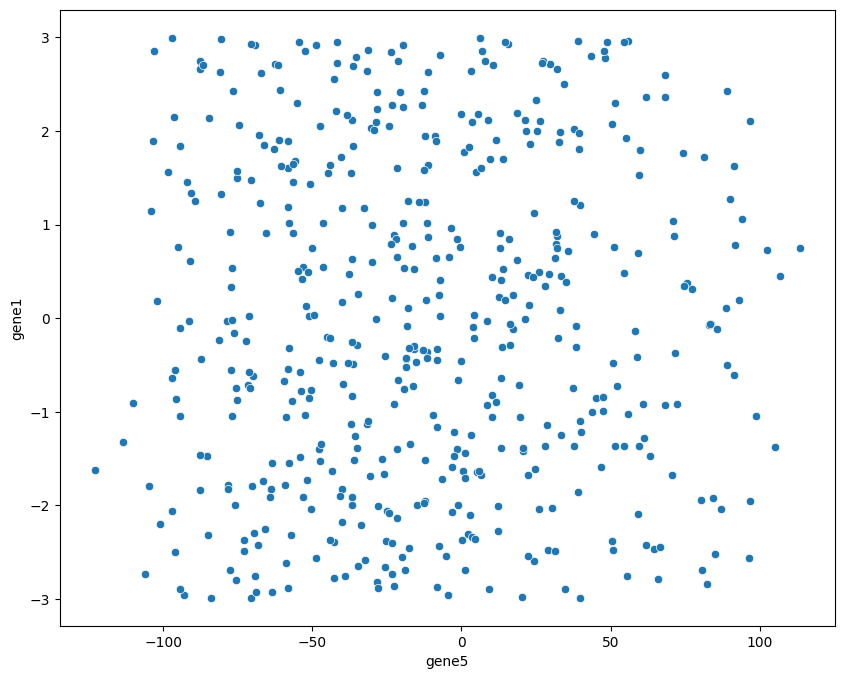

In [6]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x="gene5", y="gene1")
plt.show()

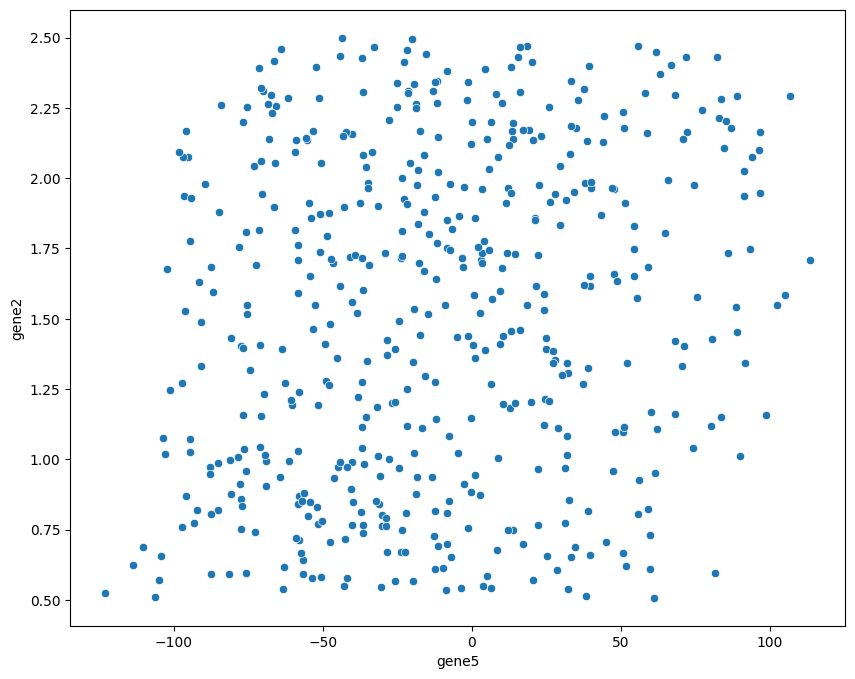

In [263]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x="gene5", y="gene2")
plt.show()

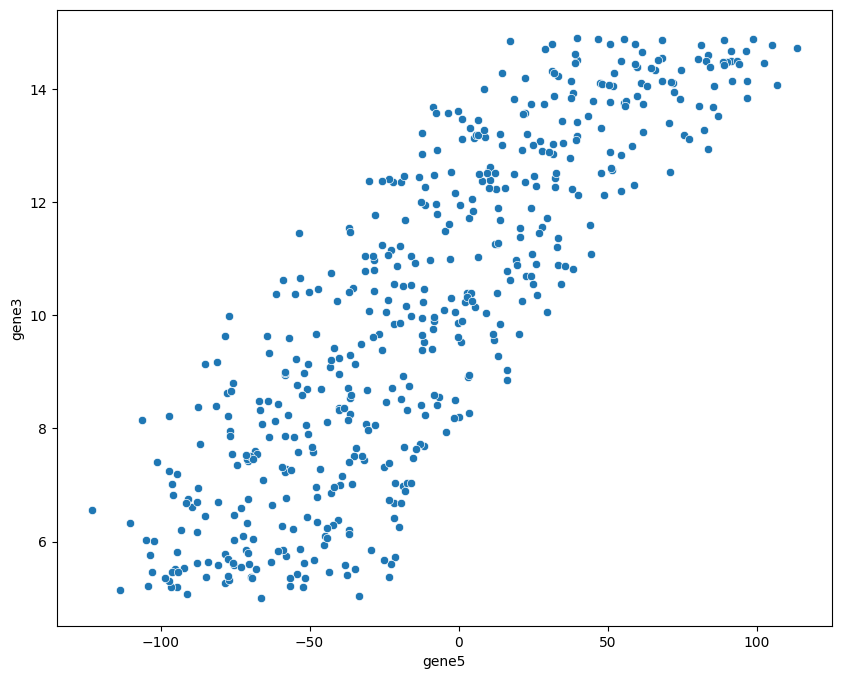

In [264]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x="gene5", y="gene3")
plt.show()

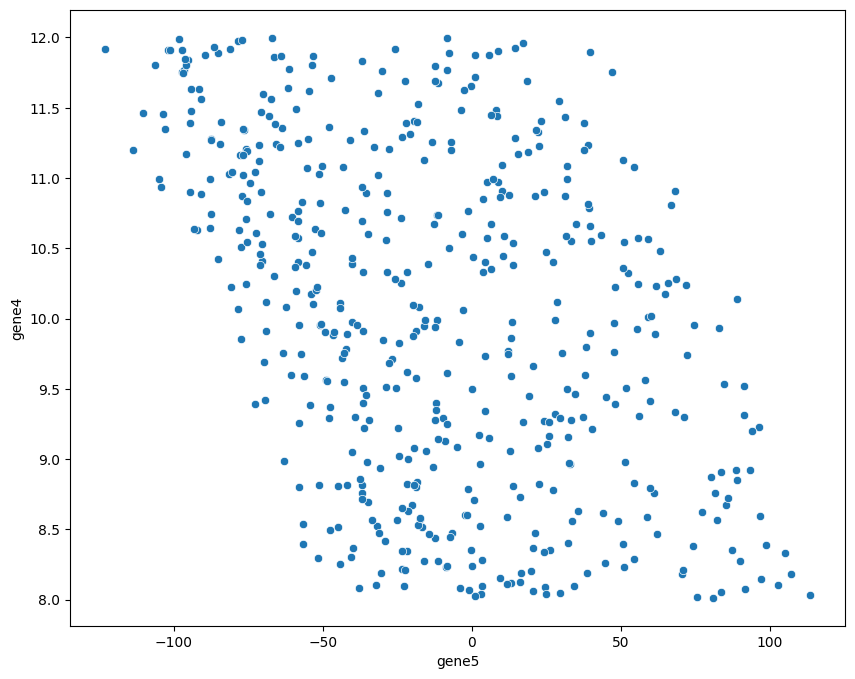

In [265]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x="gene5", y="gene4")
plt.show()

In [266]:
#create heatmap

In [267]:
corr_matrix = df.corr()

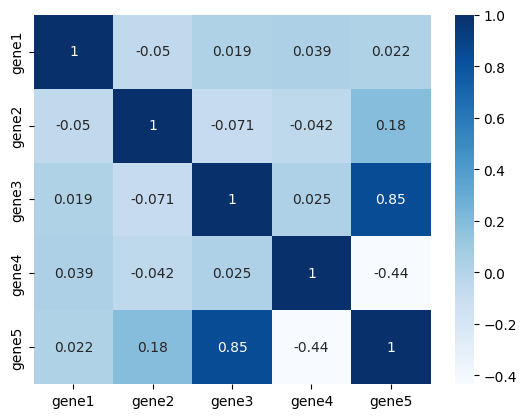

In [268]:
sns.heatmap(data=corr_matrix, annot=True, cmap='Blues')
plt.show()

In [269]:
corr_matrix["gene5"].sort_values(ascending=False)

gene5    1.000000
gene3    0.847131
gene2    0.181464
gene1    0.021899
gene4   -0.435340
Name: gene5, dtype: float64

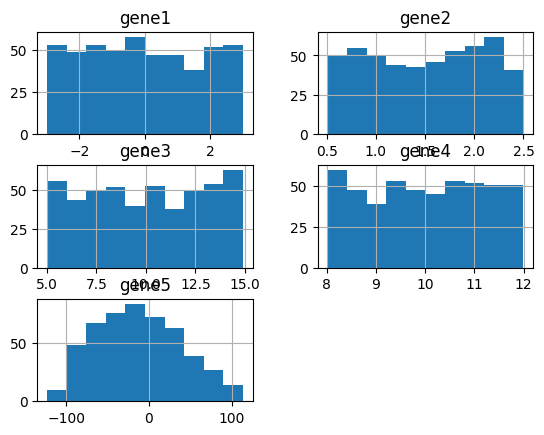

In [270]:
df.hist()
plt.show()
#standardize the data

# Tasks:
### A.Train a linear model in three modes:
- no regularization
- ridge regularization
- LASSO regularization

### B. Train a polynomial model (up to degree 10) in three modes:
- no regularization
- ridge regularization
- LASSO regularization

### For each case report the following:
- the trained models, namely, the best values of the model parameters.
- plot the learning curves for training errors and validation errors, with a 400 (train) & 100 (validation) splot of the dataset and varied training size from 20 to 400 with an increment of 20.
- discuss each case (i.e, linear model vs polynomial mode) in terms of underfitting or overfitting
- suggest the overall best model for fitting the underlying relationship between the regulate and regulators.

Model Fit according to textbook:
- If the model performs good on the training data, but badly on the validation data this is a sign of OVERFITTING. In this case, we should feed the model more data to train on. We can reason this since by the model having more data, it can help the model learn more generalizable patterns and reduce the chance of simply memorizng the noise present in the training set.

- If our model performs badly on the training data AND badly on the validation data, this is a sign of UNDERFITTING. In this case we would need to create a more complex model. By creating a more complex model, it can help to capture more complex patterns in the data and improve the models overall performance. 

- If our model performs good on the training data and good on the validation data, this is a sign of FITTING.

# Define Model Inputs:

In [7]:
#save copy of the original dataframe before making changes
df1 = df.copy()

In [8]:
df.describe()

,gene1,gene2,gene3,gene4,gene5
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,-0.034610,1.504031,10.050816,10.006586,-11.873711
std,1.746265,0.579070,2.974460,1.176975,51.241431
min,-2.985430,0.507729,5.006969,8.012850,-122.936676
25%,-1.510114,0.979516,7.469726,8.956167,-52.076382
50%,-0.101741,1.544135,10.068089,10.037739,-15.935606
75%,1.557926,2.005767,12.655920,11.022166,24.928017
max,2.997354,2.499389,14.906809,11.998275,113.418408


In [12]:
#standardize only the features, not the dependent variable 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_standardized = pd.DataFrame(scaler.fit_transform(df1.iloc[:, :4]), columns=df1.columns[:4])

#add back gene5 from original df
df_standardized[df1.columns[4]] = df1[df1.columns[4]] 

In [13]:
#set X and y variables
X = df_standardized.drop("gene5", axis=1)
y = df_standardized["gene5"]

In [14]:
#use the same train/test split across models to assess performance

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 0)     

In [15]:
#we can see that the features have been standardized
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
gene1,500.0,-3.552714e-17,1.001002,-1.691481,-0.845795,-0.038481,0.912881,1.737995
gene2,500.0,-3.312906e-16,1.001002,-1.722245,-0.906696,0.069324,0.867319,1.720613
gene3,500.0,1.563194e-16,1.001002,-1.697417,-0.868620,0.005813,0.876701,1.634198
gene4,500.0,-1.509903e-15,1.001002,-1.695646,-0.893367,0.026495,0.863737,1.693905


In [16]:
#we can see that the dependent variable gene5 has not been standardized
y.describe().transpose()

count    500.000000
mean     -11.873711
std       51.241431
min     -122.936676
25%      -52.076382
50%      -15.935606
75%       24.928017
max      113.418408
Name: gene5, dtype: float64

In [17]:
from sklearn.metrics import mean_squared_error

## Creating Functions

In [22]:
#using the same code as above, but create a zoomed in version to see the point of convergence


def zoomed_plot_learning_curve(model):
    
    train_errors, val_errors = list(), list()
    for m in range(1, X_train.shape[0]):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_test)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_test, y_val_predict))

    for i in range(0, len(train_errors)):
        if train_errors[i] > val_errors[i]:
            point = i
            print("Values intersect around: {}".format(point))
            break
            
    # max_value = max(np.max(np.sqrt(train_errors)), np.max(np.sqrt(val_errors)))
    # min_value = min(np.min(np.sqrt(train_errors)), np.min(np.sqrt(val_errors)))
    
    #instead values at i
    max_value = max(np.sqrt(train_errors[i])+2, np.sqrt(val_errors[i])+2)
    min_value = min(np.sqrt(train_errors[i])-2, np.sqrt(val_errors[i])-2)
        
        
    
    plt.figure(figsize=(12, 8))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='Training Loss')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='Validation Loss')
    plt.axvline(x=point, color='g', linestyle='--')
    plt.xlabel('Training set size')
    plt.ylabel('RMSE')
    plt.ylim([(min_value), (max_value)])
    plt.xlim([(i-5), (i+5)])
    # plt.xticks(np.arange(20, 401, 20))
    plt.legend(loc='upper right')
    plt.show()

In [23]:
#create plot_learning_curve function using similar code provided from textbook:
#change the function to use the same train/test split
#edit function to print optimal training set size
#change the plot to show varied training size from 20-400, with 20 units increments
 
def plot_learning_curve(model):

    train_errors, val_errors = list(), list()
    for m in range(1, X_train.shape[0]):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_test)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_test, y_val_predict))

    for i in range(0, len(train_errors)):
        if train_errors[i] > val_errors[i]:
            point = i
            print("Values intersect around: {}".format(point))
            break
        
    plt.figure(figsize=(12, 8))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='Training Loss')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='Validation Loss')
    plt.axvline(x=point, color='g', linestyle='--')
    plt.xlabel('Training set size')
    plt.ylabel('RMSE')
    # plt.ylim([0, 2])
    plt.xlim([20, 400])
    plt.xticks(np.arange(20, 401, 20))
    plt.legend(loc='upper right')
    plt.show()

In [24]:
 
def poly_plot_learning_curve(model):

    train_errors, val_errors = list(), list()
    for m in range(1, X_train.shape[0]):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_test)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_test, y_val_predict))

    for i in range(0, len(train_errors)):
        if train_errors[i] > val_errors[i]:
            point = i
            print("Values intersect around: {}".format(point))
            break

        
    plt.figure(figsize=(12, 8))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='Training Loss')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='Validation Loss')
    # plt.axvline(x=point, color='g', linestyle='--')
    plt.xlabel('Training set size')
    plt.ylabel('RMSE')
    # plt.ylim([0, 2])
    plt.xlim([20, 400])
    plt.xticks(np.arange(20, 401, 20))
    plt.legend(loc='upper right')
    plt.show()

# Linear Regression Model w/no regularization:

## Model Build:

In [25]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

## Learning Curve

Values intersect around: 26


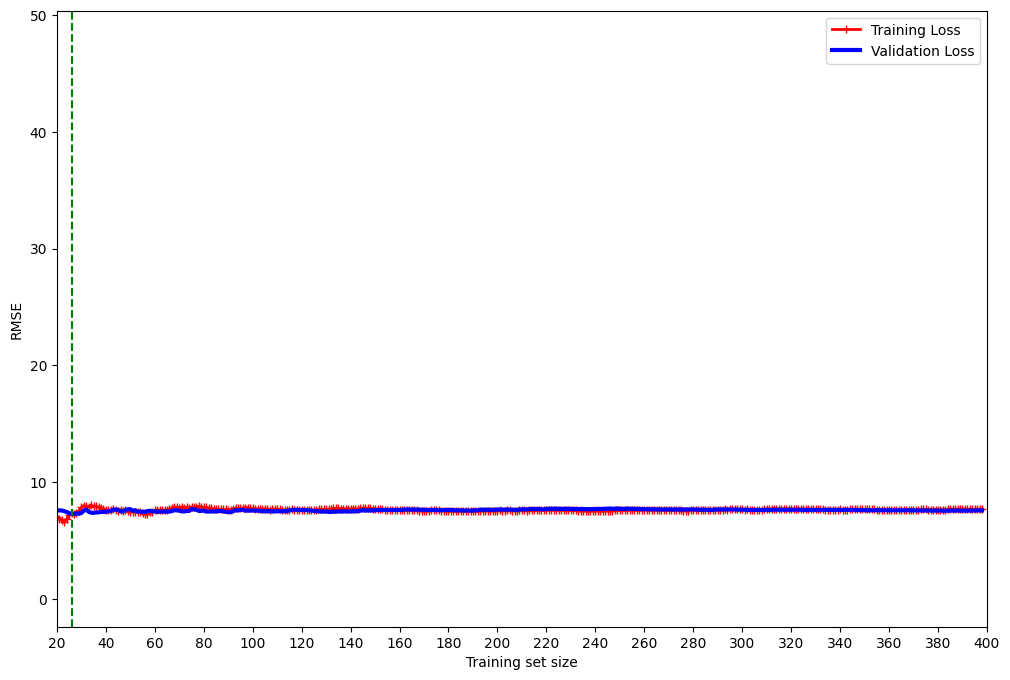

In [26]:
plot_learning_curve(lin_reg)

- To start, it is a good sign that the training loss starts at a lower error than the validation loss.
- At a training set size of anything past 150, we can see that the validation loss is higher than the training loss. This means that the training error performs better than the validation loss and therefore is a sign of overfitting.
- Our textbook states that given this hallmark sign of overfitting, we should have more training data until the validation loss reaches the training loss. We can see that both points meet near the 300 training set size.

Values intersect at: 26


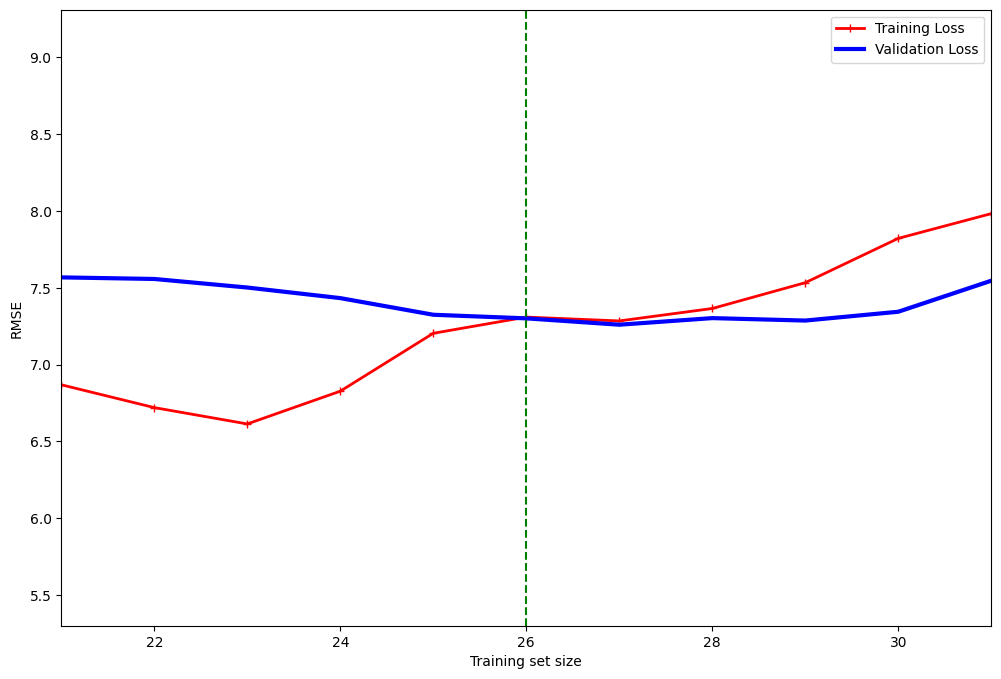

In [117]:
zoomed_plot_learning_curve(lin_reg)

## Best Values of Model Parameters:

In [27]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

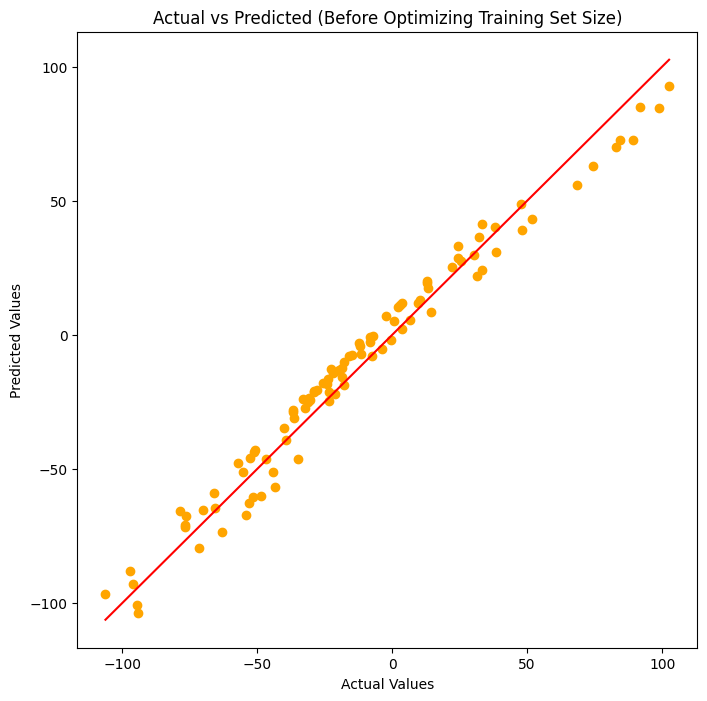

Training Score: 97.84%
Testing Score: 97.27%
Mean Squared Error of Model: 57.2887
Root Mean Squared Error of Model: 7.5689


In [28]:
#create a scatter plot to show actual y_test values vs predicted values
#print out Mean Squared Error
#print out Root Mean Squared Error

lin_reg.fit(X_train, y_train)
y_val_predict = lin_reg.predict(X_test)

plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_val_predict, color="orange")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Before Optimizing Training Set Size)")

#create line to show model performance (actual vs predicted values)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red")
plt.show()


training_score = lin_reg.score(X_train, y_train)
test_score = lin_reg.score(X_test, y_test)

print("Training Score: {:.2f}%".format(100*training_score))
print("Testing Score: {:.2f}%".format(100*test_score))

MSE = mean_squared_error(y_test, y_val_predict)
RMSE = np.sqrt(MSE)

print("Mean Squared Error of Model: {:.4f}".format(MSE))
print("Root Mean Squared Error of Model: {:.4f}".format(RMSE))

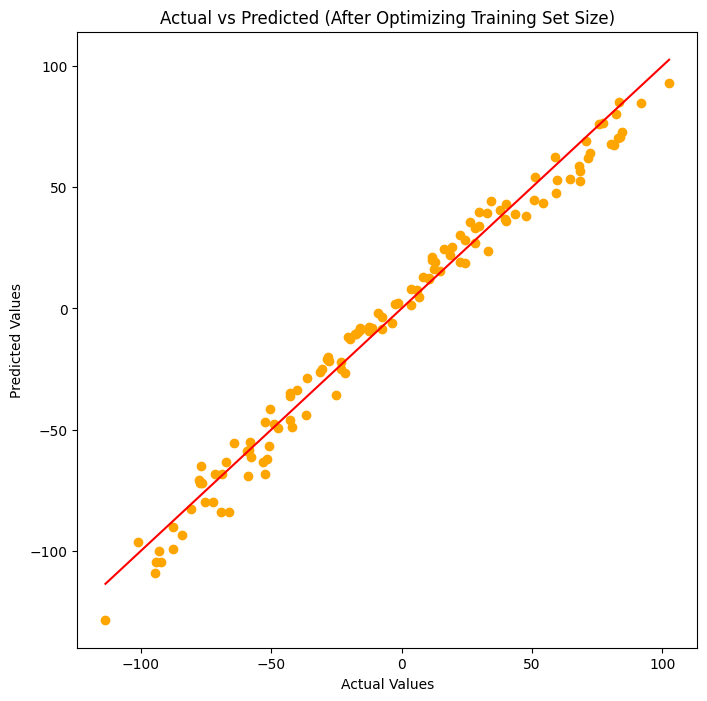

Training Score: 97.66%
Testing Score: 98.00%
Mean Squared Error of Model: 57.3247
Root Mean Squared Error of Model: 7.5713


In [30]:
#optimize model by changing test size parameter: 

new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(X, y, test_size=1-(300/400), random_state = 42)     


lin_reg.fit(new_X_train, new_y_train)
new_y_val_predict = lin_reg.predict(new_X_test)

plt.figure(figsize=(8, 8))
plt.scatter(new_y_test, new_y_val_predict, color="orange")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (After Optimizing Training Set Size)")

#Line to show algorithm performance
plt.plot([min(new_y_test), max(new_y_test)], [min(new_y_test), max(new_y_test)], color="red")
plt.show()

training_score = lin_reg.score(new_X_train, new_y_train)
test_score = lin_reg.score(new_X_test, new_y_test)

print("Training Score: {:.2f}%".format(100*training_score))
print("Testing Score: {:.2f}%".format(100*test_score))

new_MSE = mean_squared_error(new_y_test, new_y_val_predict)
new_RMSE = np.sqrt(new_MSE)

print("Mean Squared Error of Model: {:.4f}".format(new_MSE))
print("Root Mean Squared Error of Model: {:.4f}".format(new_RMSE))

- After changing our testing size, we can see that the model's testing score is performing better than the training score. This typically is another indication that our model is not overfitting. 

# Linear Regression Model w/regularization (Ridge):

In [36]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

#create an arbitrary model to then tune:
ridge_model = Ridge(alpha=10)

## Learning Curve

Values intersect around: 11


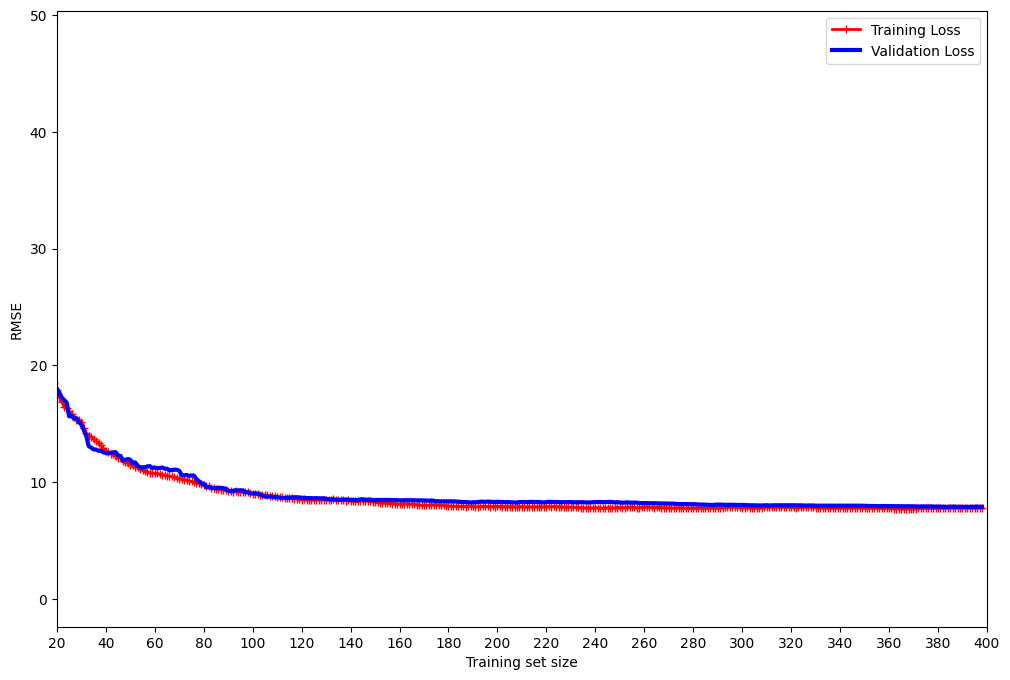

In [37]:
plot_learning_curve(ridge_model)

- At the beginning of the model, we can see both values (training loss and validation loss) decreasing, which is a good sign in the models learning ability.
- At a training set size past 120, we can see that the validation loss is higher than the training loss.
- We can also notice a gap between the training error's perforamnce and the validation loss, with the training error performing better than the validation loss, which is a hallmark of overfitting, according to our textbook. 
- Given this, a solution would be to increase the training set size until the validation loss reaches the training loss. We can see that the learning curve represents near 290 a reduction in the gap.

Values intersect around: 11


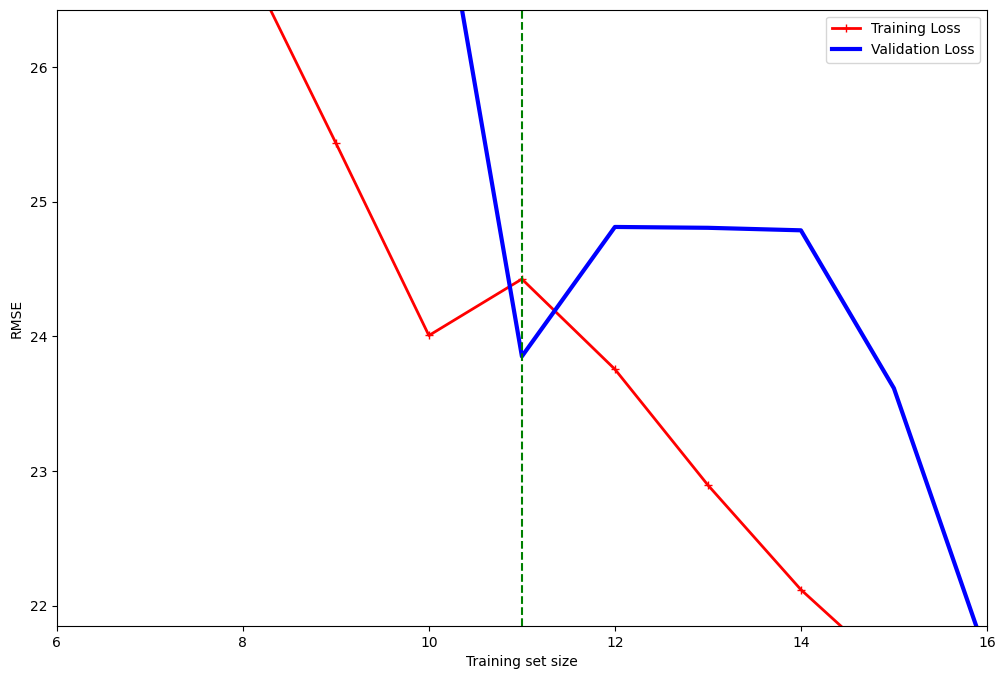

In [38]:
zoomed_plot_learning_curve(ridge_model)

## Best Values of Model Parameters:

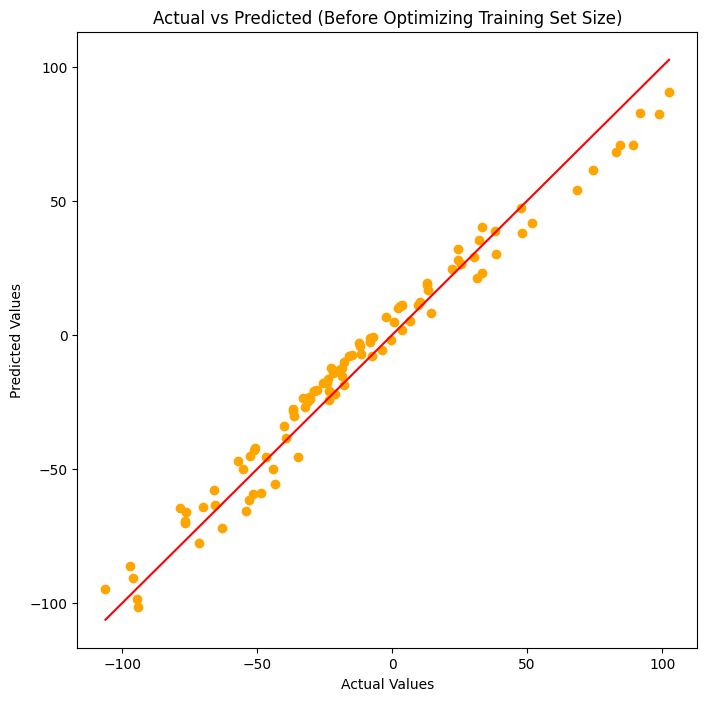

Training Score: 97.79%
Testing Score: 97.05%
Mean Squared Error of Model: 62.0501
Root Mean Squared Error of Model: 7.8772


In [39]:
ridge_model.fit(X_train, y_train)

#only apply the alpha regularization to the training model:
#from textbook: The regularization term should only be used during training, once the model is trained, we'll want to use the unregularized loss for performance evaluation.

ridge_model.set_params(alpha=0)
y_val_predict = ridge_model.predict(X_test)

plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_val_predict, color="orange")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Before Optimizing Training Set Size)")

#Line to show algorithm performance
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red")
plt.show()

#apply regularization to training method
ridge_model.set_params(alpha=45)
training_score = ridge_model.score(X_train, y_train)

#do NOT apply regularization to testing method
ridge_model.set_params(alpha=0)
test_score = ridge_model.score(X_test, y_test)

print("Training Score: {:.2f}%".format(100*training_score))
print("Testing Score: {:.2f}%".format(100*test_score))

MSE = mean_squared_error(y_test, y_val_predict)
RMSE = np.sqrt(MSE)

print("Mean Squared Error of Model: {:.4f}".format(MSE))
print("Root Mean Squared Error of Model: {:.4f}".format(RMSE))

In [107]:
#use GridSearchCV package to find optimal hyperparameters:
#textbook example:

# param_grid = {'alpha': [0.1, 1, 10, 100]}
# grid = GridSearchCV(Ridge(), param_grid, cv=5)
# grid.fit(X_train, y_train)

# # Print the best hyperparameters
# print("Best hyperparameters:", grid.best_params_)

In [40]:
alphas = [0.1, .2, .3, .4, .5, .6, .7, .8, .9, 1, 10, 100, 1000]
ridge = Ridge()

param_grid = {"alpha": alphas}
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=10)

grid_search.fit(X_train, y_train)

print("Best alpha:", grid_search.best_params_["alpha"])

ridge = Ridge(alpha=grid_search.best_params_["alpha"])
ridge.fit(X_train, y_train)

#set regularization to 0 for testing set
ridge_model.set_params(alpha=0)
test_score = ridge.score(X_test, y_test)
print("Test score:", test_score)

Best alpha: 0.6
Test score: 0.9726144461418438


In [ ]:
#change alpha value and then run plot_learning_curve to find training set size:

In [41]:
ridge_model = Ridge(alpha=0.6)

Values intersect around: 29


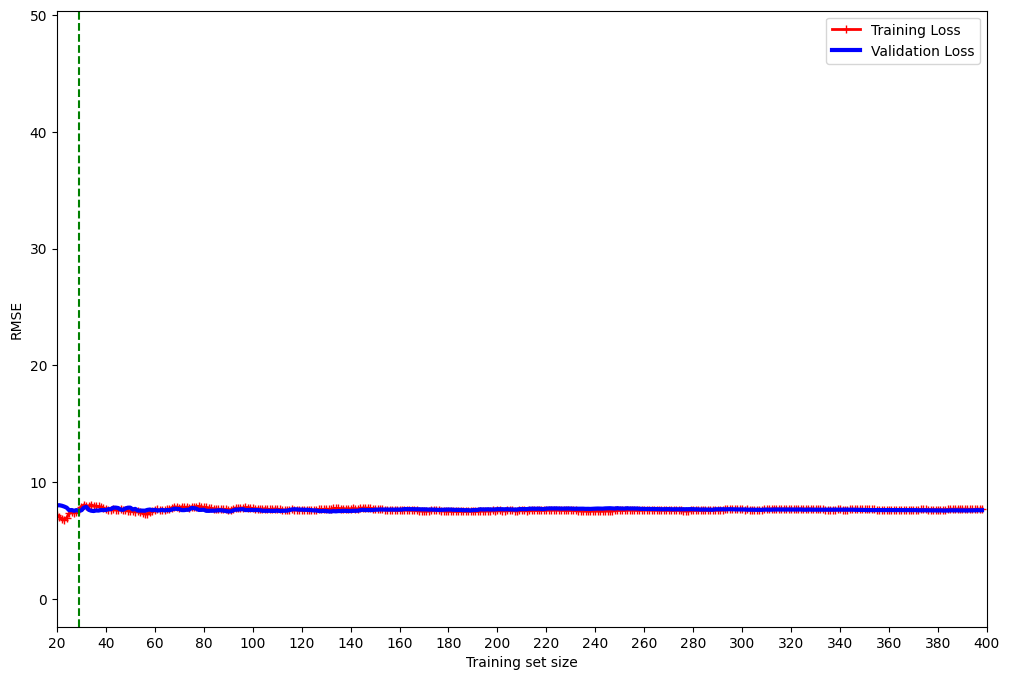

In [42]:
plot_learning_curve(ridge_model)

- At the start we can see a higher validation loss that reduces, and then a training loss that increases as the trainig set size increaes.
- Around training set size 140 and onward we can see that the training error performs better than the validation loss. This is a hallmark of overfitting and we should have more training data until the validation loss reaches the training loss.
- Around traning set size 320 we can see that both, the training loss and validation loss seem to meet together for a model that is properly fit.

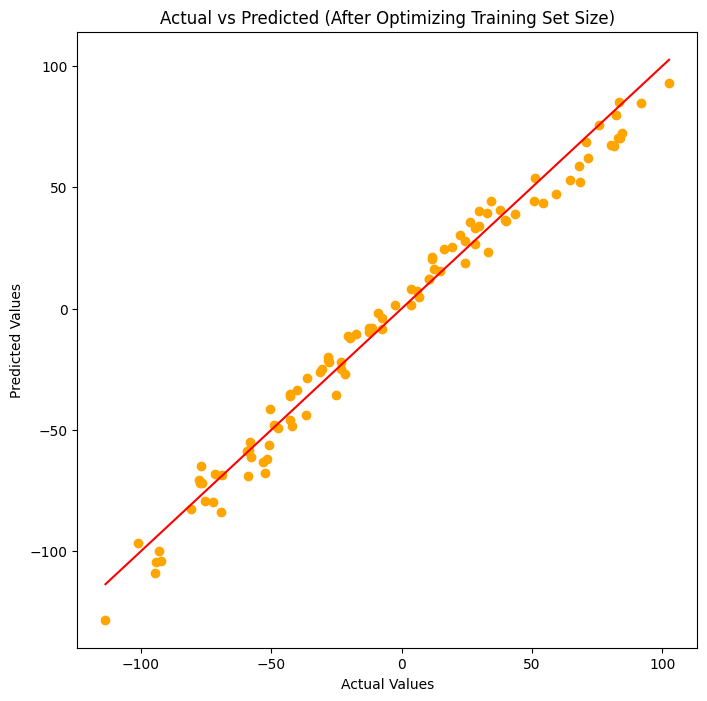

Training Score: 97.68%
Testing Score: 98.01%
Mean Squared Error of Model: 57.7774
Root Mean Squared Error of Model: 7.6011


In [43]:
#optimize model: 

new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(X, y, test_size=1-(320/400), random_state = 42)     

#only applying regularization to training set
ridge_model = Ridge(alpha=0.6)
ridge_model.fit(new_X_train, new_y_train)

#do not apply regularization to predictions
ridge_model.set_params(alpha=0)
new_y_val_predict = ridge_model.predict(new_X_test)

plt.figure(figsize=(8, 8))
plt.scatter(new_y_test, new_y_val_predict, color="orange")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (After Optimizing Training Set Size)")

#Line to show algorithm performance
plt.plot([min(new_y_test), max(new_y_test)], [min(new_y_test), max(new_y_test)], color="red")
plt.show()

#apply regularization to training set
ridge_model.set_params(alpha=.6)
training_score = ridge_model.score(new_X_train, new_y_train)

#not applying regularization to testing set
ridge_model.set_params(alpha=0)
test_score = ridge_model.score(new_X_test, new_y_test)

print("Training Score: {:.2f}%".format(100*training_score))
print("Testing Score: {:.2f}%".format(100*test_score))

new_MSE = mean_squared_error(new_y_test, new_y_val_predict)
new_RMSE = np.sqrt(new_MSE)

print("Mean Squared Error of Model: {:.4f}".format(new_MSE))
print("Root Mean Squared Error of Model: {:.4f}".format(new_RMSE))

- We can see that our testing score is slightly higher than that of our training score. This can be an indication that our model is well fit. Additionally, we can see that the model's RMSE value is within a reasonable limit given our EDA analysis. With this, we can reason that the metrics indicate that the model is making accurate predictions and the errors are not too large.


# Linear Regression Model w/LASSO regularization

In [54]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=10)

## Learning Curve

/Users/rileywagner/opt/anaconda3/envs/BINF610/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


Values intersect around: 33


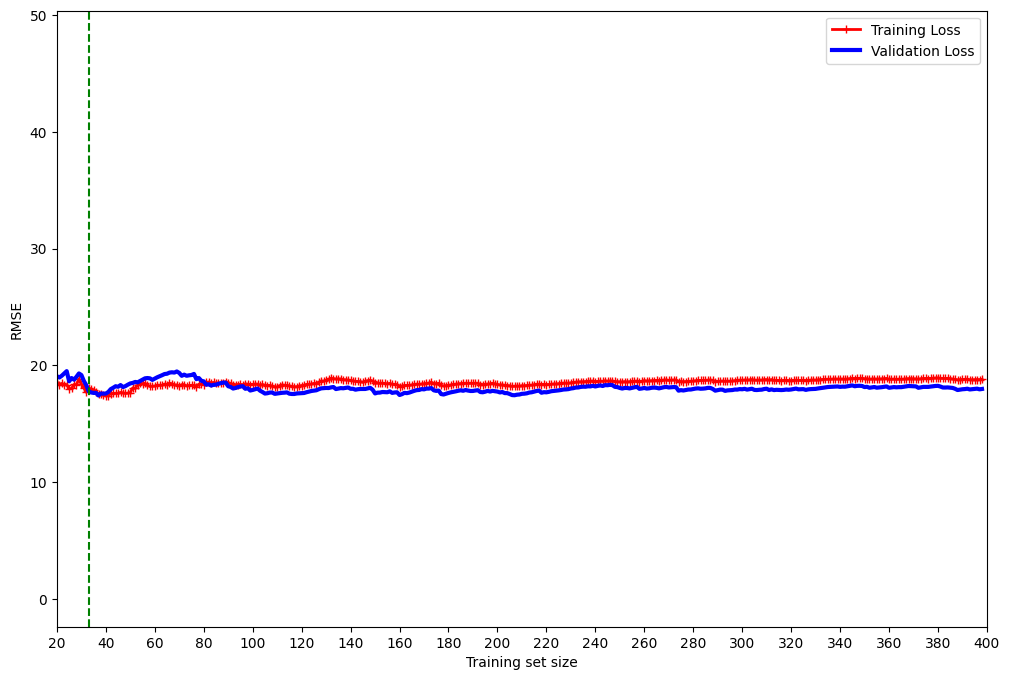

In [55]:
plot_learning_curve(lasso_reg)

- At the start, we can see that the validation loss is higher than that of the training loss. 
- From training set size of around 100 and onward, we can see that the training loss is higher than that of the validation loss. According to our textbook, this means that the training set is performing worse than that of our testing set. 
- Given that our mode is performing badly on the training data and badly on the validation loss this could be a sign of underfitting. In this case, we would need to tune the models parameters and or create a more complex model. 


/Users/rileywagner/opt/anaconda3/envs/BINF610/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


Values intersect around: 33


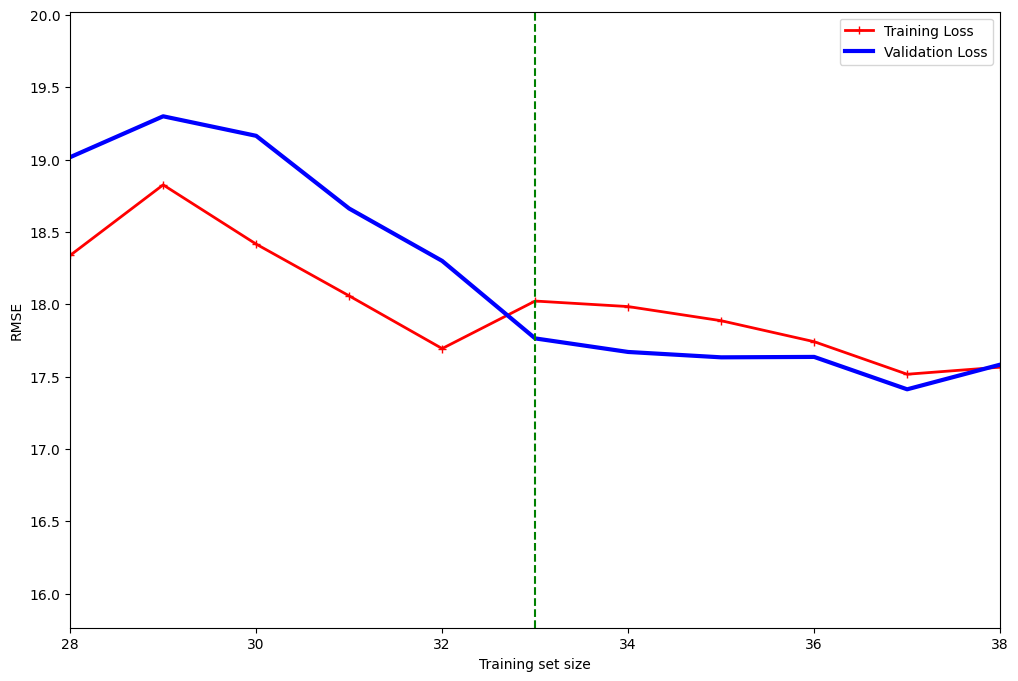

In [153]:
zoomed_plot_learning_curve(lasso_reg)

## Best Values of Model Parameters:

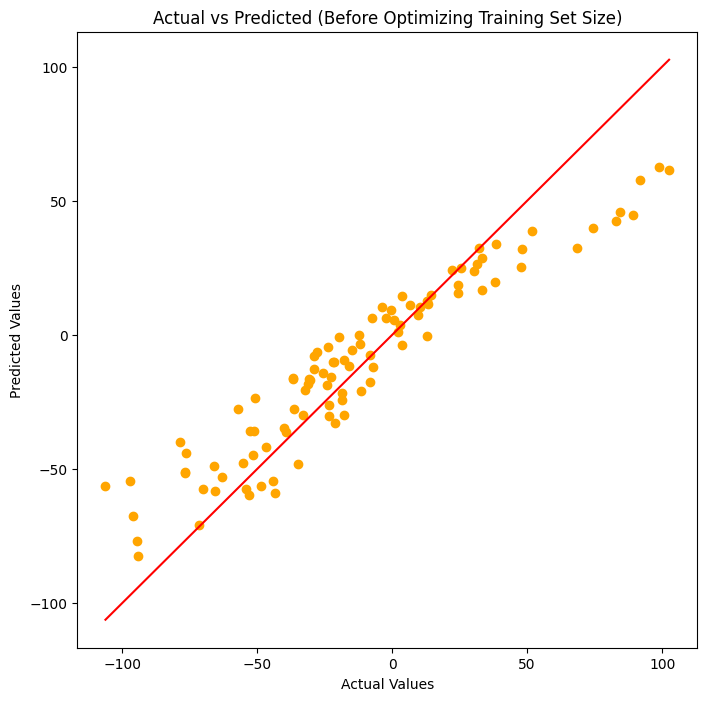

Training Score: 87.15%
Testing Score: 84.61%
Mean Squared Error of Model: 323.3411
Root Mean Squared Error of Model: 17.9817


In [56]:
lasso_reg.fit(X_train, y_train)

#Not applying regularization to the model predictions
lasso_reg.set_params(alpha=0)
y_val_predict = lasso_reg.predict(X_test)

plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_val_predict, color="orange")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Before Optimizing Training Set Size)")

#Line to show algorithm performance
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red")
plt.show()

#applying regularization to the models training
lasso_reg.set_params(alpha=10)
training_score = lasso_reg.score(X_train, y_train)

#not applying regularization to the models test
lasso_reg.set_params(alpha=0)
test_score = lasso_reg.score(X_test, y_test)

print("Training Score: {:.2f}%".format(100*training_score))
print("Testing Score: {:.2f}%".format(100*test_score))

MSE = mean_squared_error(y_test, y_val_predict)
RMSE = np.sqrt(MSE)

print("Mean Squared Error of Model: {:.4f}".format(MSE))
print("Root Mean Squared Error of Model: {:.4f}".format(RMSE))

- Just like I indicated above, I'm not surprised to see the models poor performance. This gives me even more reason to suspect that we need to tune the models parameters and or create a more complex model. 

In [57]:
#use Grid Search and Cross Validation to find optimal model parameters

alphas = [0.1, .2, .3, .4, .5, .6, .7, .8, .9, 1, 10, 100, 1000]
lasso = Lasso()

param_grid = {"alpha": alphas}
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=10)

grid_search.fit(X_train, y_train)

print("Best alpha:", grid_search.best_params_["alpha"])

# evaluate the Ridge regression model with the best alpha value on the test set
lasso = Lasso(alpha=grid_search.best_params_["alpha"])
lasso.fit(X_train, y_train)

#not applying regularization to test
lasso_reg.set_params(alpha=0)
test_score = lasso.score(X_test, y_test)
print("Test score:", test_score)

Best alpha: 0.1
Test score: 0.9723259365972338


In [58]:
lasso_reg = Lasso(alpha=.1)

/Users/rileywagner/opt/anaconda3/envs/BINF610/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


Values intersect around: 28


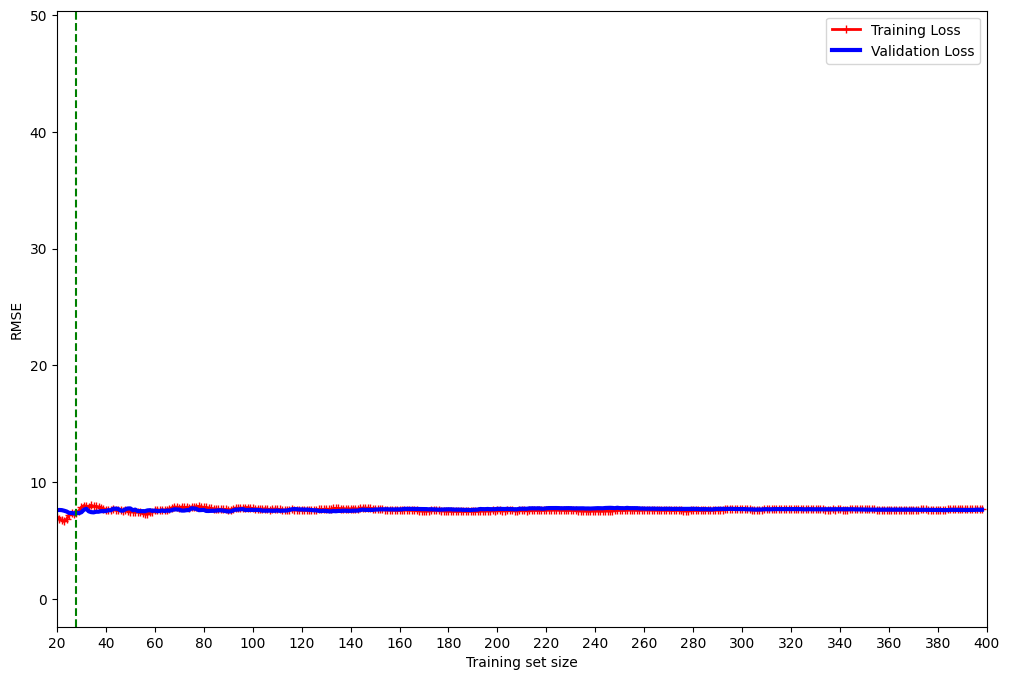

In [59]:
plot_learning_curve(lasso_reg)

- We can see that the model after being tuned starts with a higher validation loss and a lower training loss. 
- At around training set size 160, we can see that the validation loss is higher than the training loss. This is a hallmark sign of overfitting. 
- In order to solve this issue, we can feed the model a larger training set size, which you can see around training set size of 300 both the validation loss and training loss seem to meet together with the same error values. This is a sign that the model is fit. 

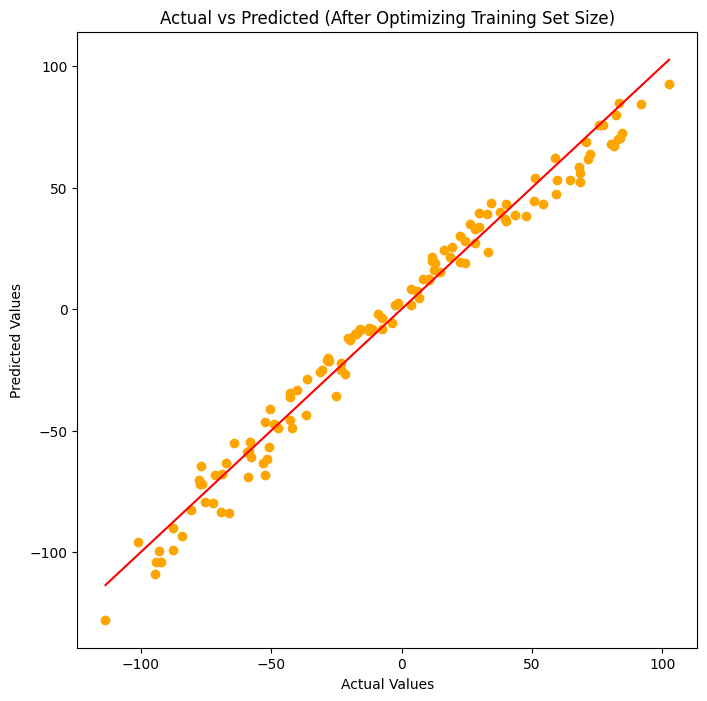

Training Score: 97.66%
Testing Score: 98.00%
Mean Squared Error of Model: 57.2959
Root Mean Squared Error of Model: 7.5694


In [60]:
#optimize model: 

new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(X, y, test_size=1-(300/400), random_state = 42)     

#applying regularization to the training
lasso_reg = Lasso(alpha=.1)
lasso_reg.fit(new_X_train, new_y_train)

#not applying regularization to the testing
lasso_reg.set_params(alpha=0)
new_y_val_predict = lasso_reg.predict(new_X_test)

plt.figure(figsize=(8, 8))
plt.scatter(new_y_test, new_y_val_predict, color="orange")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (After Optimizing Training Set Size)")

#Line to show algorithm performance
plt.plot([min(new_y_test), max(new_y_test)], [min(new_y_test), max(new_y_test)], color="red")
plt.show()

#applying regularzation to the training set
lasso_reg.set_params(alpha=.1)
training_score = lasso_reg.score(new_X_train, new_y_train)

#not applying regularization to the testing set
lasso_reg.set_params(alpha=0)
test_score = lasso_reg.score(new_X_test, new_y_test)

print("Training Score: {:.2f}%".format(100*training_score))
print("Testing Score: {:.2f}%".format(100*test_score))

new_MSE = mean_squared_error(new_y_test, new_y_val_predict)
new_RMSE = np.sqrt(new_MSE)

print("Mean Squared Error of Model: {:.4f}".format(new_MSE))
print("Root Mean Squared Error of Model: {:.4f}".format(new_RMSE))

- We can see tha the models testing accuarcy performed higher than the models training accuracy, which is a good sign that the model is generalizing well to new data.
- Given that the spread is also close, I have reason to suspect that because our model is performing well on the training data and the testing data that our model is fit.

# Polynomial Regression Model w/no regularization

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [62]:
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=1, include_bias=False)),
    ("lin_reg", LinearRegression())
])

## Learning Curve

Values intersect around: 26


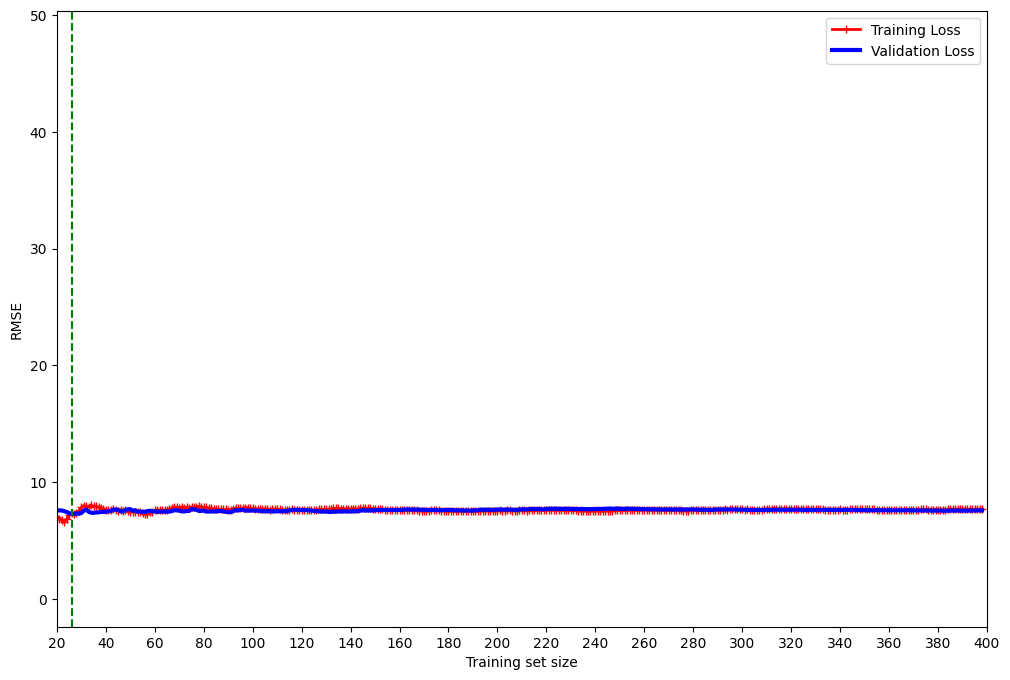

In [63]:
plot_learning_curve(polynomial_regression)

- From the start we can see that our models validation loss is greater than that of our training error. 
- At around training set size 150 and onward, we can see that the validation loss crosses over the training error. The validation loss at this point and onward is now higher than the training error, which is a sigh that the model is overfit. 
- In order to resolve this issue according to the textbook we should increase the models training set size. At around training set size 290, we can see that both the validation loss and training loss seem to meet together. This is a sign of a well fit model.

Values intersect around: 26


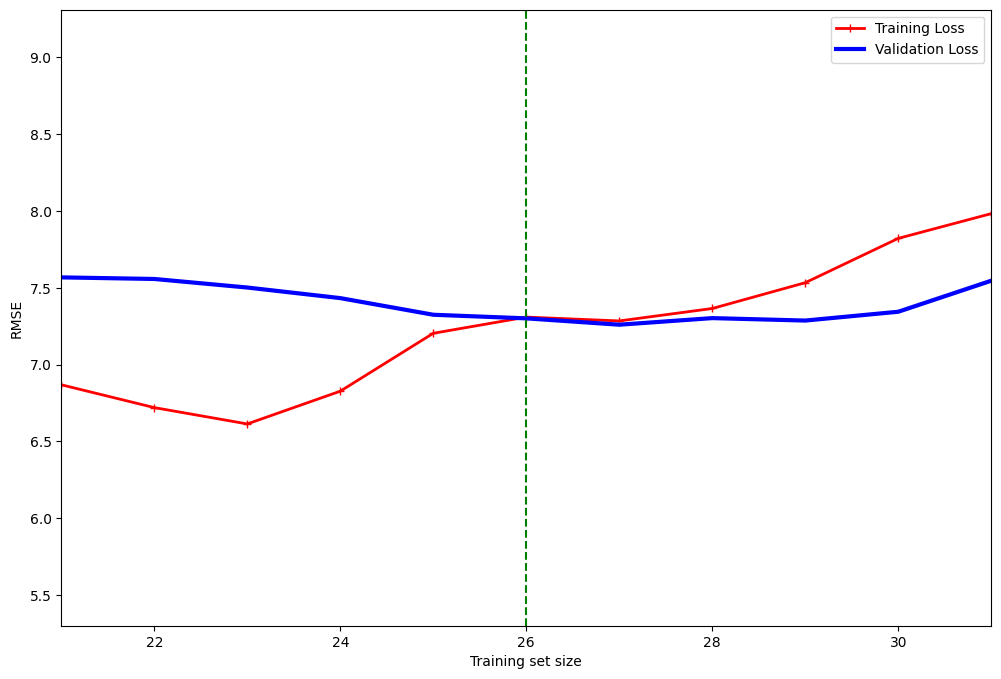

In [64]:
zoomed_plot_learning_curve(polynomial_regression)

## Best Values of Model Parameters:

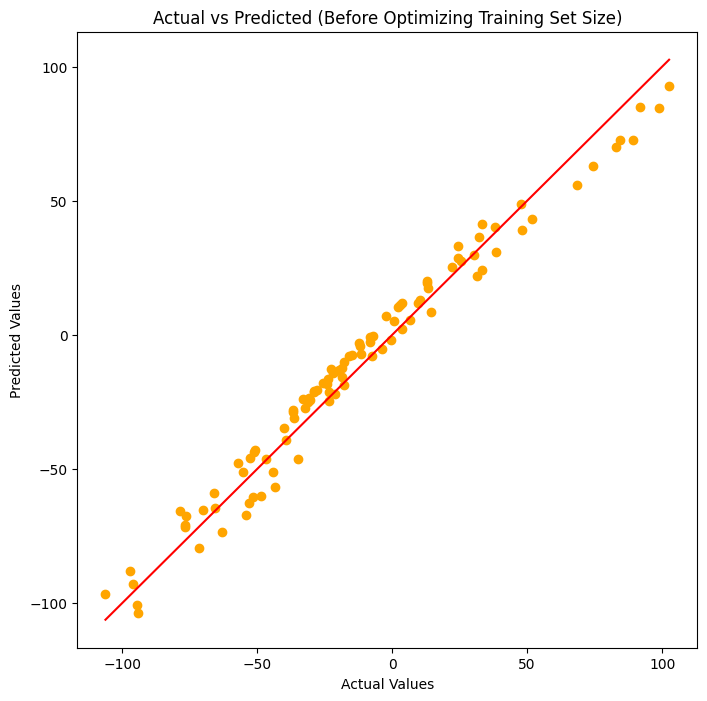

Training Score: 97.84%
Testing Score: 97.27%
Mean Squared Error of Model: 57.2887
Root Mean Squared Error of Model: 7.5689


In [65]:
polynomial_regression.fit(X_train, y_train)
y_val_predict = polynomial_regression.predict(X_test)

plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_val_predict, color="orange")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Before Optimizing Training Set Size)")

#Line to show algorithm performance
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red")
plt.show()

training_score = polynomial_regression.score(X_train, y_train)
test_score = polynomial_regression.score(X_test, y_test)

print("Training Score: {:.2f}%".format(100*training_score))
print("Testing Score: {:.2f}%".format(100*test_score))

MSE = mean_squared_error(y_test, y_val_predict)
RMSE = np.sqrt(MSE)

print("Mean Squared Error of Model: {:.4f}".format(MSE))
print("Root Mean Squared Error of Model: {:.4f}".format(RMSE))

In [209]:
# #refer to the inputs:
# polynomial_regression = Pipeline([
#     ('poly_features', PolynomialFeatures(degree=1, include_bias=False)),
#     ('lin_reg', LinearRegression())
# ])

In [66]:
degree_nums = [1,2,3,4,5,6,7,8,9,10]

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(include_bias=False)),
    ("lin_reg", LinearRegression())
])

param_grid = {"poly_features__degree": degree_nums}
grid_search = GridSearchCV(estimator=polynomial_regression, param_grid=param_grid, cv=10)

grid_search.fit(X_train, y_train)

print("Best degree:", grid_search.best_params_["poly_features__degree"])

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=grid_search.best_params_["poly_features__degree"], include_bias=False)),
    ("lin_reg", LinearRegression())
])

polynomial_regression.fit(X_train, y_train)
test_score = polynomial_regression.score(X_test, y_test)
print("Test score:", test_score)


Best degree: 2
Test score: 0.9999999999999478


In [67]:
#input new optimized value:
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
    ("lin_reg", LinearRegression())
])

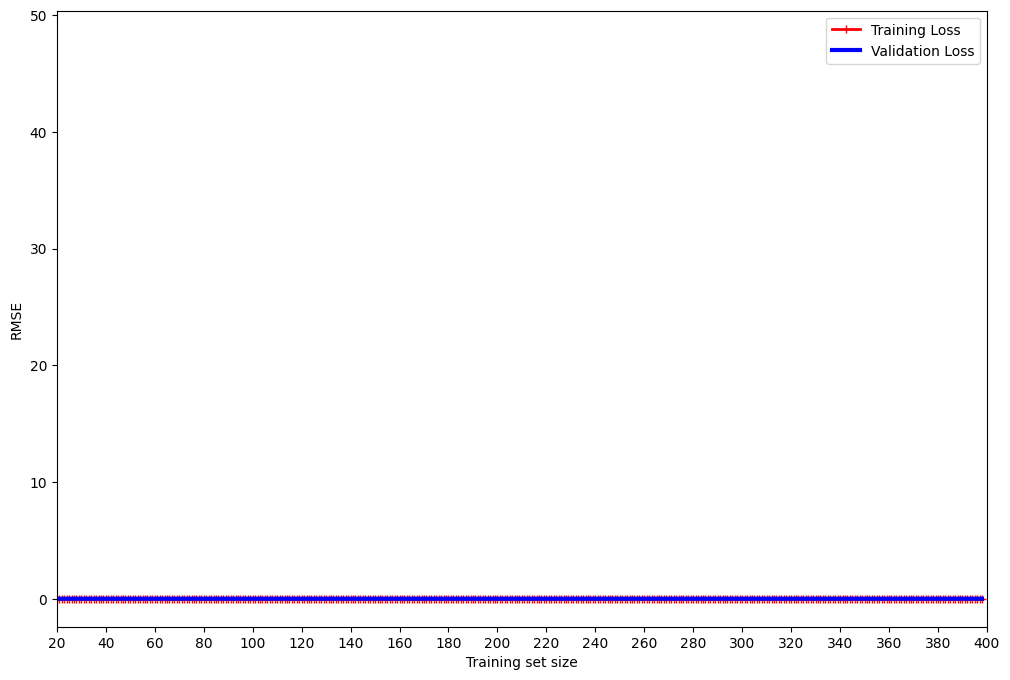

In [326]:
poly_plot_learning_curve(polynomial_regression)

- We can see that after increasing the models complexity, the model is now grossly overfit. I reason this given the perfect low error score throughout the models entire learning curve. 
- In order to solve this issue, we should reduce the model's complexity, which in this case can be resolved through reducing the number of degrees applied.

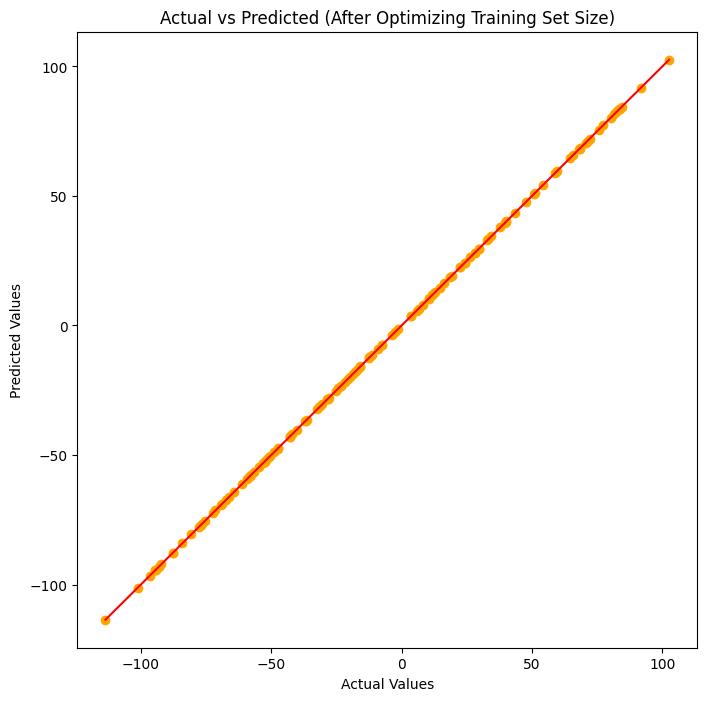

Training Score: 100.00%
Testing Score: 100.00%
Mean Squared Error of Model: 0.0000
Root Mean Squared Error of Model: 0.0000


In [68]:
#optimize model: 

new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(X, y, test_size=1-(290/400), random_state = 42)     


polynomial_regression.fit(new_X_train, new_y_train)
new_y_val_predict = polynomial_regression.predict(new_X_test)

plt.figure(figsize=(8, 8))
plt.scatter(new_y_test, new_y_val_predict, color="orange")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (After Optimizing Training Set Size)")

#Line to show algorithm performance
plt.plot([min(new_y_test), max(new_y_test)], [min(new_y_test), max(new_y_test)], color="red")
plt.show()


training_score = polynomial_regression.score(new_X_train, new_y_train)
test_score = polynomial_regression.score(new_X_test, new_y_test)

print("Training Score: {:.2f}%".format(100*training_score))
print("Testing Score: {:.2f}%".format(100*test_score))

new_MSE = mean_squared_error(new_y_test, new_y_val_predict)
new_RMSE = np.sqrt(new_MSE)

print("Mean Squared Error of Model: {:.4f}".format(new_MSE))
print("Root Mean Squared Error of Model: {:.4f}".format(new_RMSE))

- Just like mentioned above, we can now see for sure that this model is overfitted given how high the training score and the testing score are. This model has a perfect prediction. 
- It is evident that the model is overfit given that it perfectly fits the training data, which means it has memorized the noise and variability in the training data. 
- This is problematic, since this model has failed to learn the underlying patterns and relationships. If we were to reduce the degree of the model, then we would reduce the model's complexity. This would increase its ability to generalize.

In [69]:
#reducing model complexity by changing degree from 2 to 1:

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=1, include_bias=False)),
    ("lin_reg", LinearRegression())
])

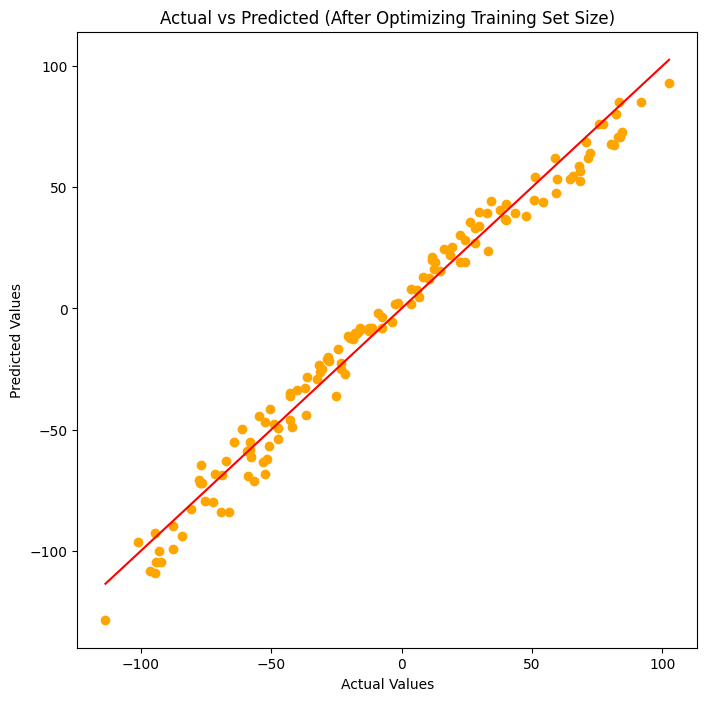

Training Score: 97.68%
Testing Score: 97.93%
Mean Squared Error of Model: 58.7953
Root Mean Squared Error of Model: 7.6678


In [70]:
#optimize model: 

new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(X, y, test_size=1-(290/400), random_state = 42)     


polynomial_regression.fit(new_X_train, new_y_train)
new_y_val_predict = polynomial_regression.predict(new_X_test)

plt.figure(figsize=(8, 8))
plt.scatter(new_y_test, new_y_val_predict, color="orange")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (After Optimizing Training Set Size)")

#Line to show algorithm performance
plt.plot([min(new_y_test), max(new_y_test)], [min(new_y_test), max(new_y_test)], color="red")
plt.show()


training_score = polynomial_regression.score(new_X_train, new_y_train)
test_score = polynomial_regression.score(new_X_test, new_y_test)

print("Training Score: {:.2f}%".format(100*training_score))
print("Testing Score: {:.2f}%".format(100*test_score))

new_MSE = mean_squared_error(new_y_test, new_y_val_predict)
new_RMSE = np.sqrt(new_MSE)

print("Mean Squared Error of Model: {:.4f}".format(new_MSE))
print("Root Mean Squared Error of Model: {:.4f}".format(new_RMSE))

- This model appears to be much better fit than the other model we created. This model is now fit, since we reduced the complexity of the model by reducing the number of degrees from 2 to 1.

# Polynomial Model w/ridge regularization

In [71]:
from sklearn.linear_model import Ridge
# ridge_reg = Ridge(alpha=1, solver="cholesky") 

#set an arbitrary number for alpha
polynomial_regression_reg = Pipeline([
    ("poly_features", PolynomialFeatures(include_bias=False)),
    ("ridge_reg", Ridge(alpha=1, solver="cholesky"))
])

## Learning Curve:

Values intersect around: 95


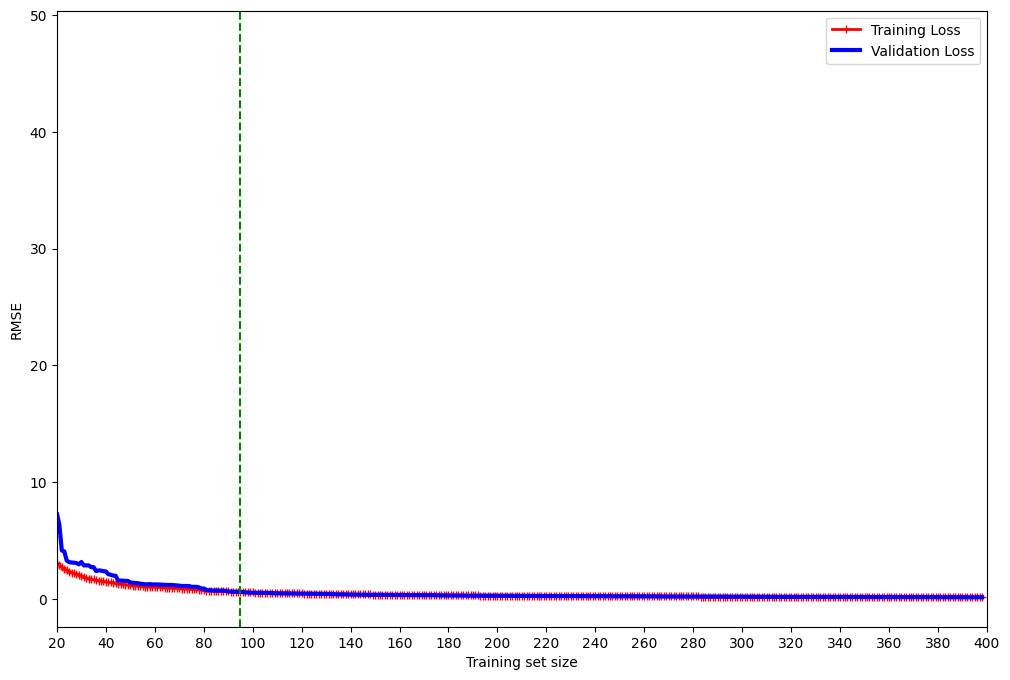

In [72]:
plot_learning_curve(polynomial_regression_reg)

- At the start of the model, we can see that the validation loss is higher than that of the training loss.
- At around training set size of 95 and onward, we can see that both the training loss and validation loss error values meet together. This is a sign of a fit model.

Values intersect around: 95


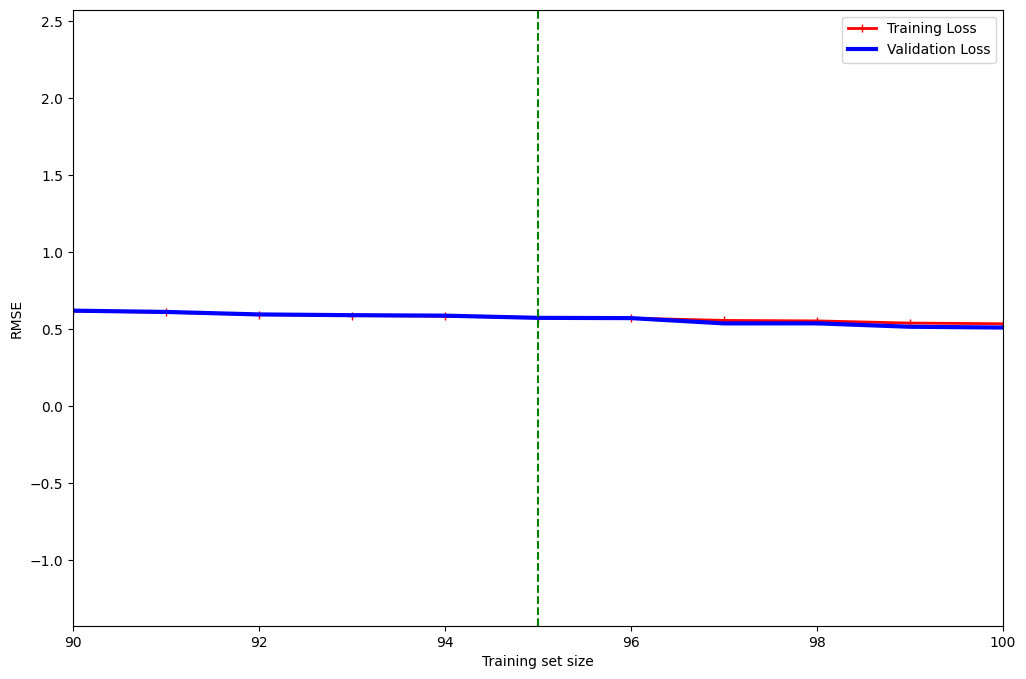

In [73]:
zoomed_plot_learning_curve(polynomial_regression_reg)

## Best Values of Model Parameters:

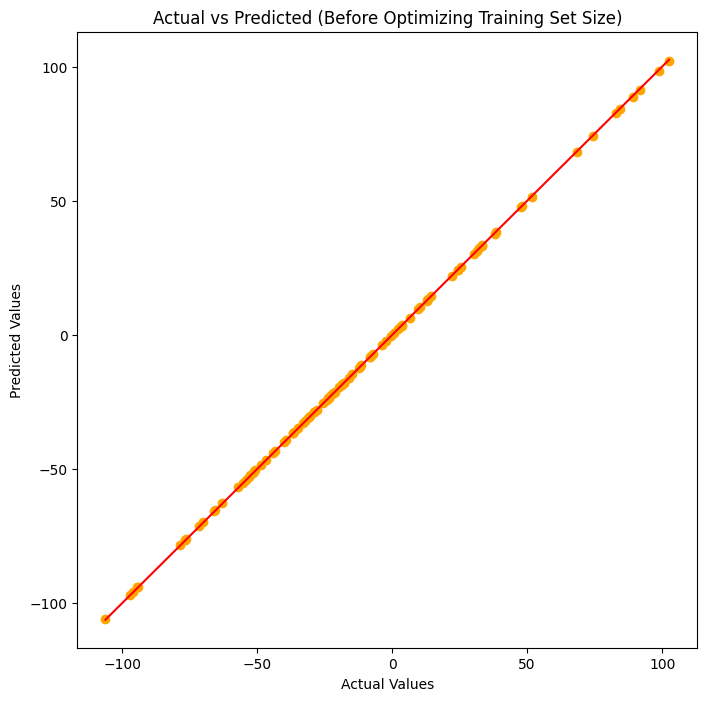

Training Score: 100.00%
Testing Score: 100.00%
Mean Squared Error of Model: 0.0156
Root Mean Squared Error of Model: 0.1248


In [74]:
polynomial_regression_reg.fit(X_train, y_train)

#not applying regularization to testing set
polynomial_regression_reg.set_params(ridge_reg__alpha=0)
y_val_predict = polynomial_regression_reg.predict(X_test)

plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_val_predict, color="orange")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Before Optimizing Training Set Size)")

#Line to show algorithm performance
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red")
plt.show()

#applying regularization to training set
polynomial_regression_reg.set_params(ridge_reg__alpha=1)
training_score = polynomial_regression_reg.score(X_train, y_train)

#not applying regularization to testing set
polynomial_regression_reg.set_params(ridge_reg__alpha=0)
test_score = polynomial_regression_reg.score(X_test, y_test)

print("Training Score: {:.2f}%".format(100*training_score))
print("Testing Score: {:.2f}%".format(100*test_score))

MSE = mean_squared_error(y_test, y_val_predict)
RMSE = np.sqrt(MSE)

print("Mean Squared Error of Model: {:.4f}".format(MSE))
print("Root Mean Squared Error of Model: {:.4f}".format(RMSE))

In [76]:
#test up to 10 degrees
degree_nums = [1,2,3,4,5,6,7,8,9,10]


alpha = [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1, 10]

polynomial_regression_reg = Pipeline([
    ("poly_features", PolynomialFeatures(include_bias=False)),
    ("ridge_reg", Ridge(alpha=1, solver="cholesky"))
])

param_grid = {"poly_features__degree": degree_nums,
             "ridge_reg__alpha": alpha}

grid_search = GridSearchCV(estimator=polynomial_regression_reg, param_grid=param_grid, cv=10)

grid_search.fit(X_train, y_train)

polynomial_regression_reg = Pipeline([
    ("poly_features", PolynomialFeatures(degree=grid_search.best_params_["poly_features__degree"], include_bias=False)),
    ("ridge_reg", Ridge(alpha=grid_search.best_params_["ridge_reg__alpha"], solver="cholesky"))
])

print("Best degree:", grid_search.best_params_["poly_features__degree"])
print("Best alpha:", grid_search.best_params_["ridge_reg__alpha"])


#apply regularization to training set
polynomial_regression_reg.fit(X_train, y_train)

#do not apply regularization to testing set
polynomial_regression_reg.set_params(ridge_reg__alpha=0)
test_score = polynomial_regression_reg.score(X_test, y_test)
print("Test score:", test_score)


Best degree: 2
Best alpha: 0.1
Test score: 0.9999999254488015


In [77]:
#setting model to best parameters:

polynomial_regression_reg = Pipeline([
    ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
    ("ridge_reg", Ridge(alpha=.1, solver="cholesky"))
])

Values intersect around: 95


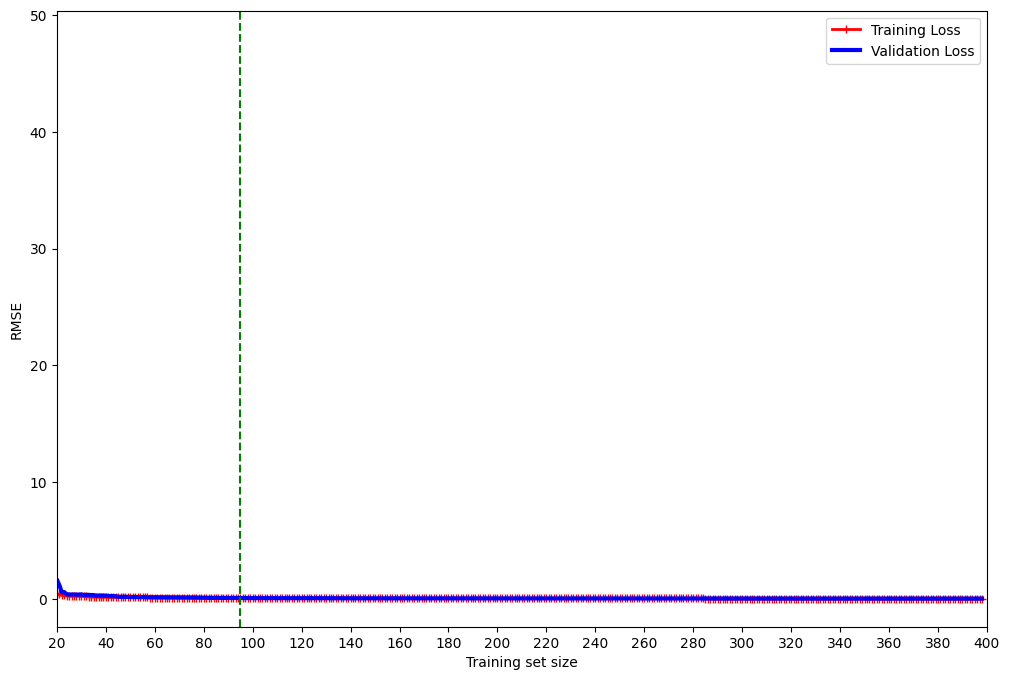

In [78]:
plot_learning_curve(polynomial_regression_reg)

- After incresing the models complexity, we can see that the model is now overfit. I reason this, since the training error is near perfect throughout just about the entire model's learning curve. 

In [84]:
polynomial_regression_reg = Pipeline([
    ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
    ("ridge_reg", Ridge(alpha=.1, solver="cholesky"))
])

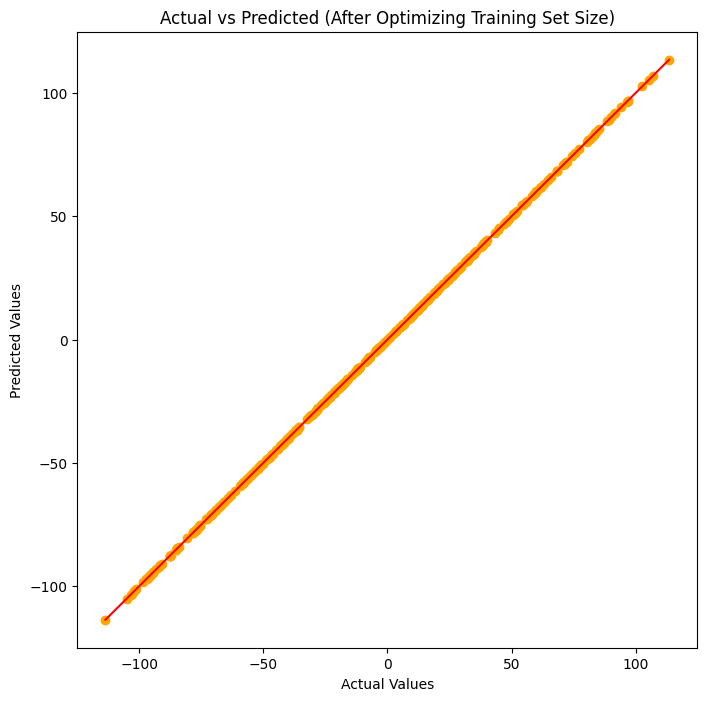

Training Score: 100.00%
Testing Score: 100.00%
Mean Squared Error of Model: 0.0000
Root Mean Squared Error of Model: 0.0000


In [80]:
#optimize model: 

new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(X, y, test_size=1-(95/400), random_state = 42)     

#fit training set with regularization
polynomial_regression_reg.fit(new_X_train, new_y_train)

#do not apply regularization to test set
polynomial_regression_reg.set_params(ridge_reg__alpha=0)
new_y_val_predict = polynomial_regression_reg.predict(new_X_test)

plt.figure(figsize=(8, 8))
plt.scatter(new_y_test, new_y_val_predict, color="orange")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (After Optimizing Training Set Size)")

#Line to show algorithm performance
plt.plot([min(new_y_test), max(new_y_test)], [min(new_y_test), max(new_y_test)], color="red")
plt.show()

#apply regularization to train set
polynomial_regression_reg.set_params(ridge_reg__alpha=.1)
training_score = polynomial_regression_reg.score(new_X_train, new_y_train)

#do not apply regularization to test set
polynomial_regression_reg.set_params(ridge_reg__alpha=0)
test_score = polynomial_regression_reg.score(new_X_test, new_y_test)

print("Training Score: {:.2f}%".format(100*training_score))
print("Testing Score: {:.2f}%".format(100*test_score))

new_MSE = mean_squared_error(new_y_test, new_y_val_predict)
new_RMSE = np.sqrt(new_MSE)

print("Mean Squared Error of Model: {:.4f}".format(new_MSE))
print("Root Mean Squared Error of Model: {:.4f}".format(new_RMSE))

- Just like suspected above, after over tuning the model's parameters, we now have overfitting. This model is not generalizing to new data. The perfect scores of both training score and testing score resemble this model's overfitting. 

- Additionally, the near perfect score of mean squared error and root mean squared error of the model suggest overfitting. In order to reduce this, we can increase our alpha. By increasing our alpha we know that we will reduce the models complexity, which will help it generalize better.

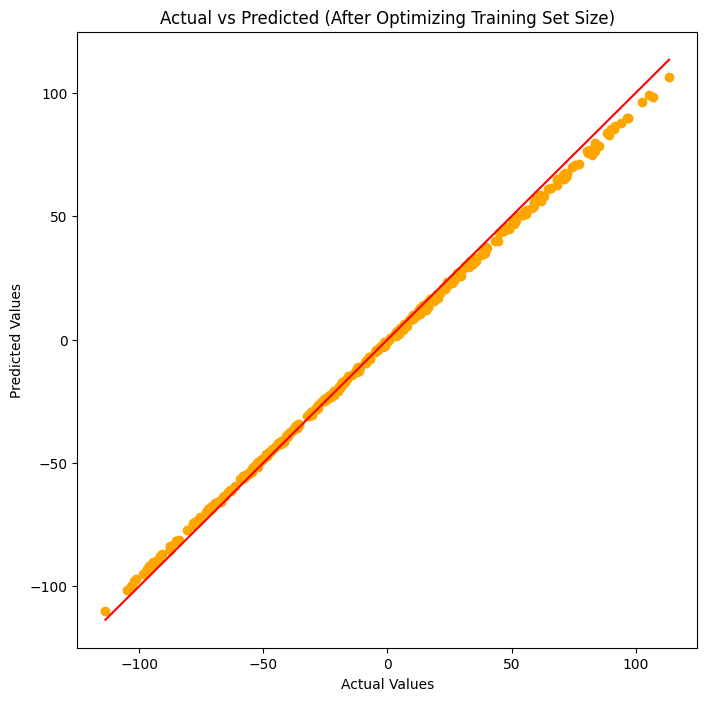

Training Score: 99.76%
Testing Score: 99.71%
Mean Squared Error of Model: 7.6917
Root Mean Squared Error of Model: 2.7734


In [90]:
#reducing the models alpha:


new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(X, y, test_size=1-(95/400), random_state = 42)     

#fit training set with regularization
polynomial_regression_reg.set_params(ridge_reg__alpha=5)
polynomial_regression_reg.fit(new_X_train, new_y_train)

#do not apply regularization to test set
polynomial_regression_reg.set_params(ridge_reg__alpha=0)
new_y_val_predict = polynomial_regression_reg.predict(new_X_test)

plt.figure(figsize=(8, 8))
plt.scatter(new_y_test, new_y_val_predict, color="orange")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (After Optimizing Training Set Size)")

#Line to show algorithm performance
plt.plot([min(new_y_test), max(new_y_test)], [min(new_y_test), max(new_y_test)], color="red")
plt.show()

#apply regularization to train set
polynomial_regression_reg.set_params(ridge_reg__alpha=5)
training_score = polynomial_regression_reg.score(new_X_train, new_y_train)

#do not apply regularization to test set
polynomial_regression_reg.set_params(ridge_reg__alpha=0)
test_score = polynomial_regression_reg.score(new_X_test, new_y_test)

print("Training Score: {:.2f}%".format(100*training_score))
print("Testing Score: {:.2f}%".format(100*test_score))

new_MSE = mean_squared_error(new_y_test, new_y_val_predict)
new_RMSE = np.sqrt(new_MSE)

print("Mean Squared Error of Model: {:.4f}".format(new_MSE))
print("Root Mean Squared Error of Model: {:.4f}".format(new_RMSE))

 - After increasing our alpha value, we can now see that this model is performing much better in its ability to generalize. This new models close training score and testing score, with a reasonable RMSE value given gene5's distribution leads me to believe that this model is able to generalize to unseen data.
 
 - This model seems to be performing much better compared to the other models, so I am still skeptical out of precaution of this model performing a little too well. I suspect, that it would be much safer to reduce the number of degrees from 2 to 1 and increasing the alpha value in order to be sure that model is not overfit. If I were to make these changes as well, this could also lead to the model being underfit. I would perform trials to see which model works the best.

# Polynomial Model w/LASSO regularization

In [ ]:
#from textbook
# >>> from sklearn.linear_model import Lasso 
# >>> lasso_reg = Lasso(alpha=0.1)

In [95]:
#set an arbitrary number for alpha
polynomial_regression_lasso = Pipeline([
    ("poly_features", PolynomialFeatures(include_bias=False)),
    ("lasso_reg", Lasso(alpha=1))
])

## Learning Curve:

/Users/rileywagner/opt/anaconda3/envs/BINF610/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


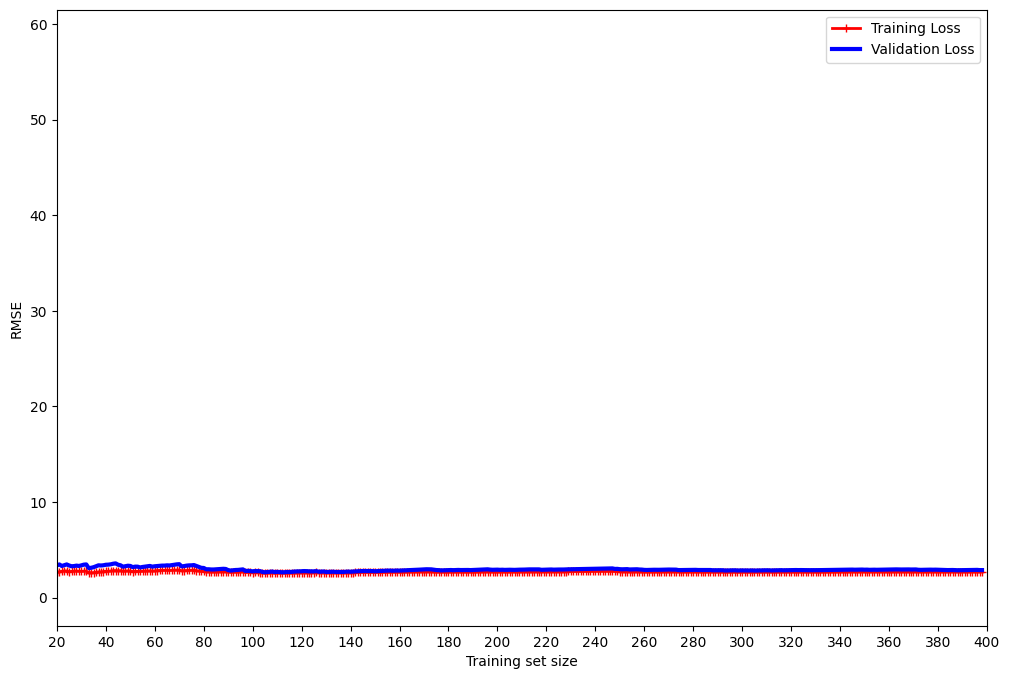

In [96]:
poly_plot_learning_curve(polynomial_regression_lasso)

- From the start we can see that the validation loss is higher than that the training loss. 
- At training set size around 110, we can see that both, the training loss and validation loss come together. This is a sign of a model well fit.

## Best Values of Model Parameters:

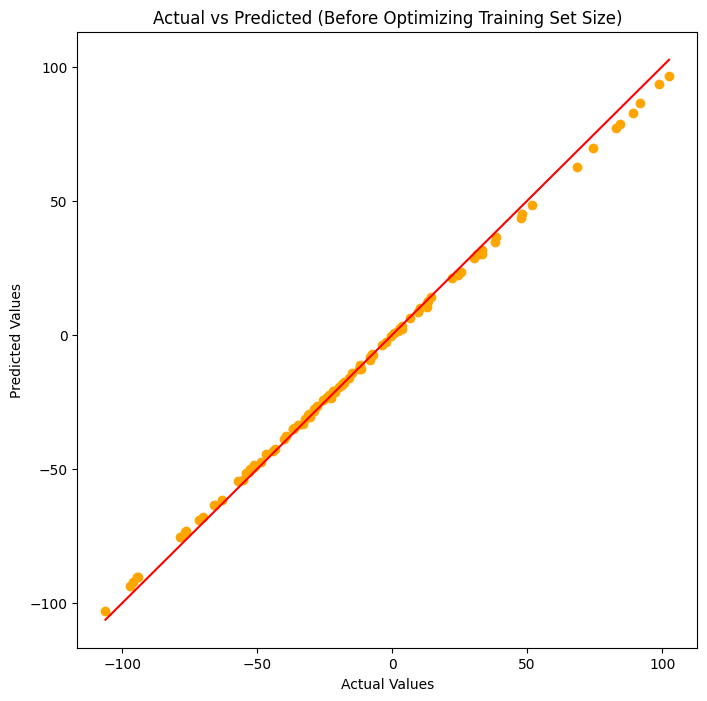

Training Score: 99.73%
Testing Score: 99.73%
Mean Squared Error of Model: 5.6235
Root Mean Squared Error of Model: 2.3714


In [97]:
polynomial_regression_lasso.fit(X_train, y_train)


#not applying regularization to testing set
polynomial_regression_lasso.set_params(lasso_reg__alpha=0)
y_val_predict = polynomial_regression_reg.predict(X_test)

plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_val_predict, color="orange")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Before Optimizing Training Set Size)")

#Line to show algorithm performance
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red")
plt.show()

#applying regularization to training set
polynomial_regression_lasso.set_params(lasso_reg__alpha=1)
training_score = polynomial_regression_lasso.score(X_train, y_train)

#not applying regularization to testing set
polynomial_regression_lasso.set_params(lasso_reg__alpha=0)
test_score = polynomial_regression_reg.score(X_test, y_test)

print("Training Score: {:.2f}%".format(100*training_score))
print("Testing Score: {:.2f}%".format(100*test_score))

MSE = mean_squared_error(y_test, y_val_predict)
RMSE = np.sqrt(MSE)

print("Mean Squared Error of Model: {:.4f}".format(MSE))
print("Root Mean Squared Error of Model: {:.4f}".format(RMSE))

In [98]:
#test up to 10 degrees
degree_nums = [1,2,3,4,5,6,7,8,9,10]


alpha = [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1, 2, 4, 6, 8, 10]

polynomial_regression_lasso = Pipeline([
    ("poly_features", PolynomialFeatures(include_bias=False)),
    ("lasso_reg", Lasso(alpha=10))
])

param_grid = {"poly_features__degree": degree_nums,
             "lasso_reg__alpha": alpha}

grid_search = GridSearchCV(estimator=polynomial_regression_lasso, param_grid=param_grid, cv=10)

grid_search.fit(X_train, y_train)

polynomial_regression_lasso = Pipeline([
    ("poly_features", PolynomialFeatures(degree=grid_search.best_params_["poly_features__degree"], include_bias=False)),
    ("lasso_reg", Ridge(alpha=grid_search.best_params_["lasso_reg__alpha"]))
])

print("Best degree:", grid_search.best_params_["poly_features__degree"])
print("Best alpha:", grid_search.best_params_["lasso_reg__alpha"])


#apply regularization to training set
polynomial_regression_lasso.fit(X_train, y_train)

#do not apply regularization to testing set
polynomial_regression_lasso.set_params(lasso_reg__alpha=0)
test_score = polynomial_regression_lasso.score(X_test, y_test)
print("Test score:", test_score)


/Users/rileywagner/opt/anaconda3/envs/BINF610/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.470e+02, tolerance: 9.770e+01
  model = cd_fast.enet_coordinate_descent(
/Users/rileywagner/opt/anaconda3/envs/BINF610/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.752e+02, tolerance: 9.976e+01
  model = cd_fast.enet_coordinate_descent(
/Users/rileywagner/opt/anaconda3/envs/BINF610/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the 

Best degree: 2
Best alpha: 0.1
Test score: 0.9999999254488015


In [99]:
polynomial_regression_lasso = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 2, include_bias=False)),
    ("lasso_reg", Lasso(alpha=1))
])

/Users/rileywagner/opt/anaconda3/envs/BINF610/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


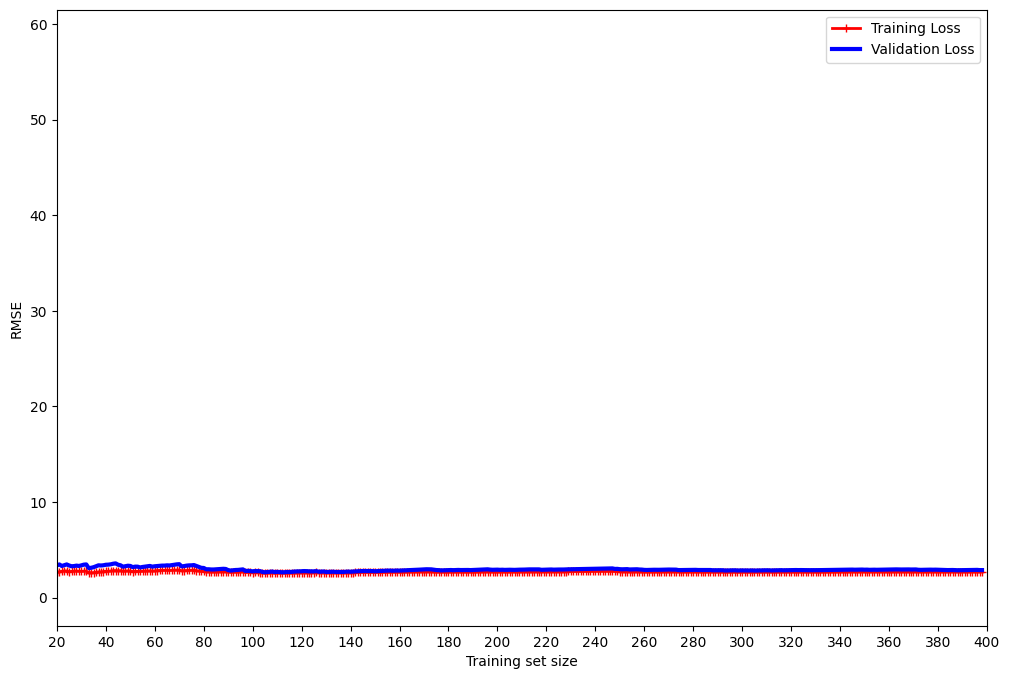

In [100]:
poly_plot_learning_curve(polynomial_regression_lasso)

- Around training set size of 110, we can see that the validation loss and trainig error seem as though their values are the same.

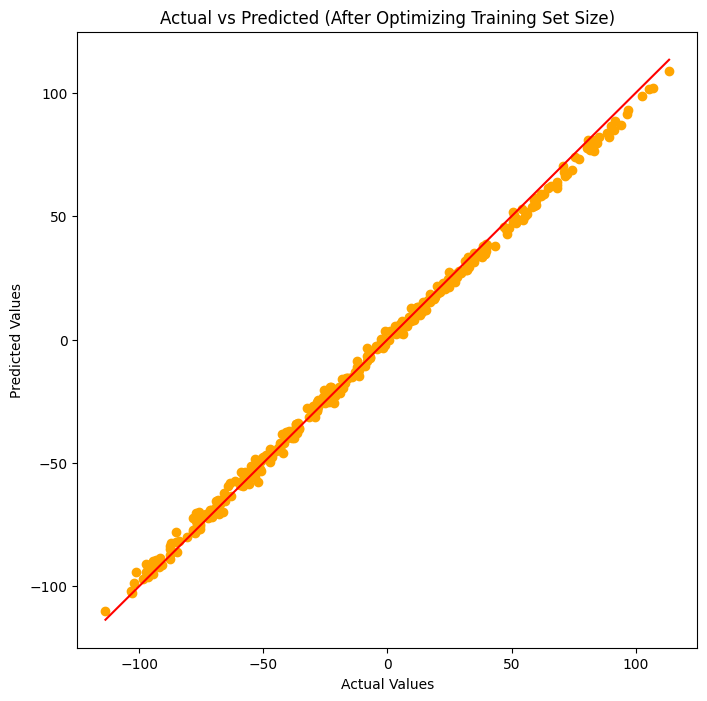

Training Score: 99.71%
Testing Score: 99.71%
Mean Squared Error of Model: 7.6455
Root Mean Squared Error of Model: 2.7650


In [101]:
#optimize model: 

new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(X, y, test_size=1-(110/400), random_state = 42)     

#fit training set with regularization
polynomial_regression_lasso.fit(new_X_train, new_y_train)

#do not apply regularization to test set
polynomial_regression_lasso.set_params(lasso_reg__alpha=0)
new_y_val_predict = polynomial_regression_lasso.predict(new_X_test)

plt.figure(figsize=(8, 8))
plt.scatter(new_y_test, new_y_val_predict, color="orange")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (After Optimizing Training Set Size)")

#Line to show algorithm performance
plt.plot([min(new_y_test), max(new_y_test)], [min(new_y_test), max(new_y_test)], color="red")
plt.show()

#apply regularization to train set
polynomial_regression_lasso.set_params(lasso_reg__alpha=.1)
training_score = polynomial_regression_lasso.score(new_X_train, new_y_train)

#do not apply regularization to test set
polynomial_regression_lasso.set_params(lasso_reg__alpha=0)
test_score = polynomial_regression_lasso.score(new_X_test, new_y_test)

print("Training Score: {:.2f}%".format(100*training_score))
print("Testing Score: {:.2f}%".format(100*test_score))

new_MSE = mean_squared_error(new_y_test, new_y_val_predict)
new_RMSE = np.sqrt(new_MSE)

print("Mean Squared Error of Model: {:.4f}".format(new_MSE))
print("Root Mean Squared Error of Model: {:.4f}".format(new_RMSE))

- This model appears to be performing well given how close the training score and testing scores match eachother. Additionally, the RMSE value while near low, is not perfect. While this model appears to be performing much better than the others, I am still skeptical that this model is overfit given how near perfect both the training and test scores are. 

- In order to reduce this, we could reduce the model's complexity by reducing the number of degrees set within the models parameters and increase the alpha. Both of these changes would reduce the model's overall complexity, which would reduce overfitting. It is important to note that reducing the number of degress, while increasing the alpha could lead to a model that is now underift as well.

- Overall throughout this homework project it has been very interesting to see how as we increase and change a model's parameters how model performance subsequently increases or decreases! 
